# **PART 1: EDA & Data Cleaning. Professor: Maryam-  CMPT 2400**

### **Defining the Problem**

**Based on NPRI data, what is the predicted proportion of releases to disposals in 2023?**

The proportion of releases to disposals is a metric that quantifies the ratio of total releases to total disposals. It is calculated using the following formula: ***Proportion = Total Releases/ Total Disposals.***


*   **Total Releases:** This represents the total amount of pollutants released directly into the environment across various media, such as air, water, and land.
*   **Total Disposals:** This indicates the total amount of pollutants managed through different disposal methods, such as landfill, recycling, and treatment.


The proportion measures the relative scale of direct releases compared to controlled disposals. A higher proportion indicates that more pollutants are being released relative to disposals, while a lower proportion suggests better pollution management through disposal practices.

### **Exploring the Data**

**Overview of the Dataset**

The dataset used for this project comes from the National Pollutant Release Inventory (NPRI) and includes three main components, each stored as a separate tab:


1.   **Releases 2000-2020:**


  *   This tab contains data on the total amounts of pollutants released directly into the environment across Canada from 2000 to 202.2 It includes releases to air, water, and land, with further breakdowns into sub-categories such as stack emissions, fugitive emissions, spills, and leaks.
  *   The data in this tab provides insights into how pollutants are emitted across various mediums and regions over time, helping to understand trends and shifts in pollutant management strategies.


2.   **Disposals and Transfers 00-20:**


  *   This tab records information on how pollutants are managed through disposal or transferred for treatment during the same period (2000-2022). It includes on-site disposals (e.g., landfills) and transfers to other locations for disposal or recycling.
  *   It is a crucial component for understanding how waste is managed beyond direct releases, offering a complete picture of pollutant management and industrial compliance with disposal regulations.



3.   **Comments:**


  *   This tab contains contextual notes that explain significant data trends, anomalies, and regulatory changes that may have affected pollutant reporting over the years.
  *   It helps interpret the data more accurately, providing context to unusual values, sudden changes in trends, or inconsistencies in data recording.



## **STEP 2: Issue Detection/ Pattern Discovery**

Based on the previous information and the goal of predicting the proportion of releases to disposals in 2023, I have decided to start with the EDA for 'Releases 2000-2020':

1. Understand the Dataset

2. Define Objectives

3. Initial Check

### **Important libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# File path to the Excel file
file_path = "/content/drive/My Drive/NPRI_2000-2022.xlsx"

# Load each sheet into a separate DataFrame
df_releases = pd.read_excel(file_path, sheet_name='Releases 2000-2020')
df_disposals = pd.read_excel(file_path, sheet_name='Disposals and Transfers 00-20')

# Display the first few rows of each sheet
print("First few rows of Releases Data:")
print(df_releases.head())

print("\nFirst few rows of Disposals Data:")
print(df_disposals.head())


First few rows of Releases Data:
   Reporting_Year / Année  NPRI_ID / No_INRP Number of employees  \
0                    2000                  1                 440   
1                    2000                  1                 440   
2                    2000                  1                 440   
3                    2000                  1                 440   
4                    2000                  1                 440   

  Company_Name / Dénomination_sociale_de_l'entreprise  \
0             Alberta-Pacific Forest Industries Inc.    
1             Alberta-Pacific Forest Industries Inc.    
2             Alberta-Pacific Forest Industries Inc.    
3             Alberta-Pacific Forest Industries Inc.    
4             Alberta-Pacific Forest Industries Inc.    

  Facility_Name / Installation  NAICS / Code_SCIAN  \
0                      (blank)              322112   
1                      (blank)              322112   
2                      (blank)              322112   

### **Dataset**

**Initial checks**

In [3]:
df_releases.shape

(737516, 28)

In [4]:
df_disposals.shape

(191645, 41)

In [5]:
print(df_releases.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737516 entries, 0 to 737515
Data columns (total 28 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   Reporting_Year / Année                                 737516 non-null  int64  
 1   NPRI_ID / No_INRP                                      737516 non-null  int64  
 2   Number of employees                                    736900 non-null  object 
 3   Company_Name / Dénomination_sociale_de_l'entreprise    737516 non-null  object 
 4   Facility_Name / Installation                           736340 non-null  object 
 5   NAICS / Code_SCIAN                                     737516 non-null  int64  
 6   NAICS Title / Titre Code_SCIAN                         737516 non-null  object 
 7   PROVINCE                                               737516 non-null  object 
 8   City                              

In [6]:
print(df_disposals.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191645 entries, 0 to 191644
Data columns (total 41 columns):
 #   Column                                                                                       Non-Null Count   Dtype  
---  ------                                                                                       --------------   -----  
 0   Reporting_Year / Année                                                                       191645 non-null  int64  
 1   NPRI_ID / No_INRP                                                                            191645 non-null  int64  
 2   Number of employees                                                                          191551 non-null  object 
 3   Company_Name / Dénomination_sociale_de_l'entreprise                                          191645 non-null  object 
 4   Facility_Name / Installation                                                                 191019 non-null  object 
 5   NAICS / Code_SCIAN     

In [7]:
print(df_releases.describe())


       Reporting_Year / Année  NPRI_ID / No_INRP  NAICS / Code_SCIAN  \
count           737516.000000      737516.000000       737516.000000   
mean              2012.267601       11248.268386       289175.551820   
std                  6.400156        9352.868266        94788.542197   
min               2000.000000           1.000000       111120.000000   
25%               2007.000000        3775.000000       211113.000000   
50%               2012.000000        7114.000000       312140.000000   
75%               2018.000000       18093.000000       327120.000000   
max               2022.000000      306556.000000       913910.000000   

            Latitude      Longitude  Release to Air - Fugitive  \
count  733434.000000  733434.000000              125032.000000   
mean       49.644636     -97.375436                  61.156824   
std         5.155658      20.184399                 797.572502   
min         0.000000    -140.883600                   0.000000   
25%        45.431000 

In [8]:
print(df_disposals.describe())

       Reporting_Year / Année  NPRI_ID / No_INRP  NAICS / Code_SCIAN  \
count           191645.000000      191645.000000       191645.000000   
mean              2011.289958        6494.859626       322061.467171   
std                  6.513027        6824.137165        96060.473632   
min               2000.000000           1.000000       111120.000000   
25%               2006.000000        2451.000000       221320.000000   
50%               2011.000000        4540.000000       325510.000000   
75%               2017.000000        6926.000000       334410.000000   
max               2022.000000       33869.000000       913910.000000   

            Latitude      Longitude  Off-site Disposal - Land Treatment  \
count  190474.000000  190474.000000                        10921.000000   
mean       47.814052     -90.788715                           82.475758   
std         4.948937      19.328259                          677.826775   
min         0.000000    -137.228150                

## **STEP 3: Fixing Bad Housekeeping**

1.   Remove Duplicates
2. Column Dropping
3. Split the Data
4. Convert columns to the right data type
4.   Handle Missing Values
5.   Standardize Column Names
6.   Convert Units
7.   Fix Inconsistent Text
8.   Outlier Detection




### **Remove Duplicates**

In [9]:
# Check for duplicates in the releases data
duplicate_count = df_releases.duplicated().sum()
print(f"Number of duplicate rows in the releases data: {duplicate_count}")

# If duplicates exist, remove them
if duplicate_count > 0:
    df_releases = df_releases.drop_duplicates()
    print("Duplicates removed from the releases data.")

# Repeat for the disposals data
duplicate_count_disposals = df_disposals.duplicated().sum()
print(f"Number of duplicate rows in the disposals data: {duplicate_count_disposals}")

if duplicate_count_disposals > 0:
    df_disposals = df_disposals.drop_duplicates()
    print("Duplicates removed from the disposals data.")


Number of duplicate rows in the releases data: 0
Number of duplicate rows in the disposals data: 0


### **Converting Units to Tonnes**


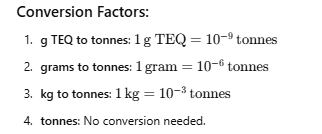

In [10]:
# List of columns to convert for Releases and Disposals
release_columns = [
    'Release to Air - Fugitive',
    'Release to Air - Other Non-Point',
    'Release to Air - Road dust',
    'Release to Air - Spills',
    'Release to Air - Stack / Point',
    'Release to Air - Storage / Handling',
    'Releases to Land - Leaks',
    'Releases to Land - Other',
    'Releases to Land - Spills',
    'Releases to Water Bodies - Direct Discharges',
    'Releases to Water Bodies - Leaks',
    'Releases to Water Bodies - Spills',
    'Sum of release to all media (<1tonne)'
]

disposal_columns = [
    'Off-site Disposal - Land Treatment',
    'Off-site Disposal - Landfill',
    'Off-site Disposal - Storage',
    'Off-site Disposal - Tailings Management',
    'Off-site Disposal - Underground Injection',
    'Off-site Disposal - Waste Rock management',
    'Off-site Transfers for Recycling - Energy Recovery',
    'Off-site Transfers for Recycling - Other',
    'Off-site Transfers for Recycling - Recovery of Acids and Bases',
    'Off-site Transfers for Recycling - Recovery of Catalysts',
    'Off-site Transfers for Recycling - Recovery of Inorganic Materials (not metals)',
    'Off-site Transfers for Recycling - Recovery of Metals and Metal Compounds',
    'Off-site Transfers for Recycling - Recovery of Organic Substances (not solvents)',
    'Off-site Transfers for Recycling - Recovery of Pollution Abatement Residues',
    'Off-site Transfers for Recycling - Recovery of Solvents',
    'Off-site Transfers for Recycling - Refining or Re-use of Used Oil',
    'Off-site Transfers for Treatment Prior to Final Disposal - Biological Treatment',
    'Off-site Transfers for Treatment Prior to Final Disposal - Chemical Treatment',
    'Off-site Transfers for Treatment Prior to Final Disposal - Incineration / Thermal',
    'Off-site Transfers for Treatment Prior to Final Disposal - Municipal Sewage Treatment Plant',
    'Off-site Transfers for Treatment Prior to Final Disposal - Physical Treatment',
    'On-site Disposal - Land Treatment',
    'On-site Disposal - Landfill',
    'On-site Disposal - Tailings Management',
    'On-site Disposal - Underground Injection',
    'On-site Disposal - Waste Rock management'
]

# Function to convert selected columns to tonnes
def convert_columns_to_tonnes(df, unit_col, columns_to_convert):
    # Define conversion factors
    conversion_factors = {
        'g TEQ': 1e-9,  # grams Toxic Equivalents
        'grams': 1e-6,  # grams to tonnes
        'kg': 1e-3,     # kilograms to tonnes
        'tonnes': 1     # already in tonnes
    }

    # Iterate over columns and apply conversion
    for col in columns_to_convert:
        if col in df.columns:  # Ensure the column exists in the dataframe
            df[col] = df.apply(
                lambda row: row[col] * conversion_factors[row[unit_col]] if not pd.isna(row[col]) else 0,
                axis=1
            )

    # Update the Units column to "tonnes"
    df[unit_col] = 'tonnes'
    return df

# Convert Releases and Disposals data
df_releases_converted = convert_columns_to_tonnes(df_releases, 'Units / Unités', release_columns)
df_disposals_converted = convert_columns_to_tonnes(df_disposals, 'Units / Unités', disposal_columns)

# Print a preview
print("Releases Data (Converted to Tonnes):")
print(df_releases_converted.head())

print("\nDisposals Data (Converted to Tonnes):")
print(df_disposals_converted.head())


Releases Data (Converted to Tonnes):
   Reporting_Year / Année  NPRI_ID / No_INRP Number of employees  \
0                    2000                  1                 440   
1                    2000                  1                 440   
2                    2000                  1                 440   
3                    2000                  1                 440   
4                    2000                  1                 440   

  Company_Name / Dénomination_sociale_de_l'entreprise  \
0             Alberta-Pacific Forest Industries Inc.    
1             Alberta-Pacific Forest Industries Inc.    
2             Alberta-Pacific Forest Industries Inc.    
3             Alberta-Pacific Forest Industries Inc.    
4             Alberta-Pacific Forest Industries Inc.    

  Facility_Name / Installation  NAICS / Code_SCIAN  \
0                      (blank)              322112   
1                      (blank)              322112   
2                      (blank)              32211

In [11]:
# Check if all units are now "tonnes"
def verify_units(df, unit_col):
    unique_units = df[unit_col].unique()  # Get all unique values in the units column
    if len(unique_units) == 1 and unique_units[0] == 'tonnes':
        print(f"All units are successfully converted to tonnes.")
    else:
        print(f"Not all units are converted. Found these units: {unique_units}")

# Verify for Releases and Disposals
print("Verifying units in Releases:")
verify_units(df_releases_converted, 'Units / Unités')

print("\nVerifying units in Disposals:")
verify_units(df_disposals_converted, 'Units / Unités')

Verifying units in Releases:
All units are successfully converted to tonnes.

Verifying units in Disposals:
All units are successfully converted to tonnes.


In [12]:
# Display the unique units in the dataset
def show_unique_units(df, unit_col):
    unique_units = df[unit_col].unique()  # Get unique values in the Units column
    print(f"Unique units found in '{unit_col}': {unique_units}")
    return unique_units

# Check and display unique units for Releases and Disposals
print("Unique units in Releases:")
release_units = show_unique_units(df_releases_converted, 'Units / Unités')

print("\nUnique units in Disposals:")
disposal_units = show_unique_units(df_disposals_converted, 'Units / Unités')

Unique units in Releases:
Unique units found in 'Units / Unités': ['tonnes']

Unique units in Disposals:
Unique units found in 'Units / Unités': ['tonnes']


### **Column dropping**

In [13]:
for col in df_releases.columns:
    print(col)

Reporting_Year / Année
NPRI_ID / No_INRP
Number of employees
Company_Name / Dénomination_sociale_de_l'entreprise
Facility_Name / Installation
NAICS / Code_SCIAN
NAICS Title / Titre Code_SCIAN
PROVINCE
City
Latitude
Longitude
CAS_Number / No_CAS
Substance Name (English) / Nom de substance (Anglais)
Units / Unités
Estimation_Method / Méthode_d’estimation
Release to Air - Fugitive
Release to Air - Other Non-Point 
Release to Air - Road dust  
Release to Air - Spills 
Release to Air - Stack / Point  
Release to Air - Storage / Handling 
Releases to Land - Leaks
Releases to Land - Other 
Releases to Land - Spills 
Releases to Water Bodies - Direct Discharges 
Releases to Water Bodies - Leaks
Releases to Water Bodies - Spills 
Sum of release to all media (<1tonne)


In [14]:
for col in df_disposals.columns:
    print(col)

Reporting_Year / Année
NPRI_ID / No_INRP
Number of employees
Company_Name / Dénomination_sociale_de_l'entreprise
Facility_Name / Installation
NAICS / Code_SCIAN
NAICS Title / Titre Code_SCIAN
PROVINCE
City
Latitude
Longitude
CAS_Number / No_CAS
Substance Name (English) / Nom de substance (Anglais)
Units / Unités
Estimation_Method / Méthode_d’estimation
Off-site Disposal - Land Treatment
Off-site Disposal - Landfill
Off-site Disposal - Storage
Off-site Disposal - Tailings Management
Off-site Disposal - Underground Injection
Off-site Disposal - Waste Rock management
Off-site Transfers for Recycling - Energy Recovery
Off-site Transfers for Recycling - Other
Off-site Transfers for Recycling - Recovery of Acids and Bases
Off-site Transfers for Recycling - Recovery of Catalysts
Off-site Transfers for Recycling - Recovery of Inorganic Materials (not metals)
Off-site Transfers for Recycling - Recovery of Metals and Metal Compounds
Off-site Transfers for Recycling - Recovery of Organic Substanc

In [15]:
columns_to_drop_releases = [
    'Number of employees',
    'Estimation_Method / Méthode_d’estimation'
]

columns_to_drop_disposals = [
    'Number of employees',
    'Estimation_Method / Méthode_d’estimation',
    'Off-site Transfers for Recycling - Energy Recovery',
    'Off-site Transfers for Recycling - Other',
    'Off-site Transfers for Recycling - Recovery of Acids and Bases',
    'Off-site Transfers for Recycling - Recovery of Catalysts',
    'Off-site Transfers for Recycling - Recovery of Inorganic Materials (not metals)',
    'Off-site Transfers for Recycling - Recovery of Metals and Metal Compounds',
    'Off-site Transfers for Recycling - Recovery of Organic Substances (not solvents)',
    'Off-site Transfers for Recycling - Recovery of Pollution Abatement Residues',
    'Off-site Transfers for Recycling - Recovery of Solvents',
    'Off-site Transfers for Recycling - Refining or Re-use of Used Oil',
    'Off-site Transfers for Treatment Prior to Final Disposal - Biological Treatment',
    'Off-site Transfers for Treatment Prior to Final Disposal - Chemical Treatment',
    'Off-site Transfers for Treatment Prior to Final Disposal - Incineration / Thermal',
    'Off-site Transfers for Treatment Prior to Final Disposal - Municipal Sewage Treatment Plant',
    'Off-site Transfers for Treatment Prior to Final Disposal - Physical Treatment'
]

# Drop the columns from the DataFrames
df_releases_cleaned = df_releases.drop(columns=columns_to_drop_releases, errors='ignore')
df_disposals_cleaned = df_disposals.drop(columns=columns_to_drop_disposals, errors='ignore')

# Display the cleaned DataFrames
print("Columns in cleaned 'Releases 2000-2020':")
for col in df_releases_cleaned.columns:
    print(col)

print("\nColumns in cleaned 'Disposals and Transfers 00-20':")
# Print cleaned columns for 'Disposals and Transfers 00-20'
for col in df_disposals_cleaned.columns:
    print(col)

Columns in cleaned 'Releases 2000-2020':
Reporting_Year / Année
NPRI_ID / No_INRP
Company_Name / Dénomination_sociale_de_l'entreprise
Facility_Name / Installation
NAICS / Code_SCIAN
NAICS Title / Titre Code_SCIAN
PROVINCE
City
Latitude
Longitude
CAS_Number / No_CAS
Substance Name (English) / Nom de substance (Anglais)
Units / Unités
Release to Air - Fugitive
Release to Air - Other Non-Point 
Release to Air - Road dust  
Release to Air - Spills 
Release to Air - Stack / Point  
Release to Air - Storage / Handling 
Releases to Land - Leaks
Releases to Land - Other 
Releases to Land - Spills 
Releases to Water Bodies - Direct Discharges 
Releases to Water Bodies - Leaks
Releases to Water Bodies - Spills 
Sum of release to all media (<1tonne)

Columns in cleaned 'Disposals and Transfers 00-20':
Reporting_Year / Année
NPRI_ID / No_INRP
Company_Name / Dénomination_sociale_de_l'entreprise
Facility_Name / Installation
NAICS / Code_SCIAN
NAICS Title / Titre Code_SCIAN
PROVINCE
City
Latitude
Lon

### **Standardize Column Names**


In [16]:
import re  # Import regular expressions library

# Function to clean column names
def clean_column_name(col_name):
    # Trims whitespace from the start and end of the column name.
    col_name = col_name.strip()

    # Convert to lowercase
    col_name = col_name.lower()

    # Removes any character that is not a word character (a-z, A-Z, 0-9, or _) or space
    col_name = re.sub(r'[^\w\s]', '', col_name)

    # Replaces all internal spaces (including multiple consecutive spaces) with a single underscore _.
    col_name = re.sub(r'\s+', '_', col_name)

    return col_name

# Apply the function to clean column names for Releases
df_releases_cleaned.columns = [clean_column_name(col) for col in df_releases_cleaned.columns]
print("Cleaned column names for Releases:")
print(df_releases_cleaned.columns)

# Apply the function to clean column names for Disposals
df_disposals_cleaned.columns = [clean_column_name(col) for col in df_disposals_cleaned.columns]
print("\nCleaned column names for Disposals:")
print(df_disposals_cleaned.columns)


Cleaned column names for Releases:
Index(['reporting_year_année', 'npri_id_no_inrp',
       'company_name_dénomination_sociale_de_lentreprise',
       'facility_name_installation', 'naics_code_scian',
       'naics_title_titre_code_scian', 'province', 'city', 'latitude',
       'longitude', 'cas_number_no_cas',
       'substance_name_english_nom_de_substance_anglais', 'units_unités',
       'release_to_air_fugitive', 'release_to_air_other_nonpoint',
       'release_to_air_road_dust', 'release_to_air_spills',
       'release_to_air_stack_point', 'release_to_air_storage_handling',
       'releases_to_land_leaks', 'releases_to_land_other',
       'releases_to_land_spills', 'releases_to_water_bodies_direct_discharges',
       'releases_to_water_bodies_leaks', 'releases_to_water_bodies_spills',
       'sum_of_release_to_all_media_1tonne'],
      dtype='object')

Cleaned column names for Disposals:
Index(['reporting_year_année', 'npri_id_no_inrp',
       'company_name_dénomination_sociale_de

### **Convert data types**

In [17]:
# Check dtypes for Releases
print("Data types for cleaned Releases data:")
print(df_releases_cleaned.dtypes)

# Check dtypes for Disposals
print("\nData types for cleaned Disposals data:")
print(df_disposals_cleaned.dtypes)


Data types for cleaned Releases data:
reporting_year_année                                  int64
npri_id_no_inrp                                       int64
company_name_dénomination_sociale_de_lentreprise     object
facility_name_installation                           object
naics_code_scian                                      int64
naics_title_titre_code_scian                         object
province                                             object
city                                                 object
latitude                                            float64
longitude                                           float64
cas_number_no_cas                                    object
substance_name_english_nom_de_substance_anglais      object
units_unités                                         object
release_to_air_fugitive                             float64
release_to_air_other_nonpoint                       float64
release_to_air_road_dust                            float64
re

In [18]:
# Convert columns to appropriate data types for Releases
df_releases_cleaned['province'] = df_releases_cleaned['province'].astype('category')
df_releases_cleaned['city'] = df_releases_cleaned['city'].astype('category')
df_releases_cleaned['naics_title_titre_code_scian'] = df_releases_cleaned['naics_title_titre_code_scian'].astype('category')
df_releases_cleaned['substance_name_english_nom_de_substance_anglais'] = df_releases_cleaned['substance_name_english_nom_de_substance_anglais'].astype('category')
df_releases_cleaned['units_unités'] = df_releases_cleaned['units_unités'].astype('category')

# Integer columns for Releases
df_releases_cleaned['reporting_year_année'] = df_releases_cleaned['reporting_year_année'].astype('int64')
df_releases_cleaned['npri_id_no_inrp'] = df_releases_cleaned['npri_id_no_inrp'].astype('int64')
df_releases_cleaned['naics_code_scian'] = df_releases_cleaned['naics_code_scian'].astype('int64')

# Float columns for geographical and measurement data in Releases
df_releases_cleaned['latitude'] = df_releases_cleaned['latitude'].astype('float64')
df_releases_cleaned['longitude'] = df_releases_cleaned['longitude'].astype('float64')
df_releases_cleaned['release_to_air_spills'] = df_releases_cleaned['release_to_air_spills'].astype('float64')
df_releases_cleaned['releases_to_land_spills'] = df_releases_cleaned['releases_to_land_spills'].astype('float64')
df_releases_cleaned['releases_to_water_bodies_spills'] = df_releases_cleaned['releases_to_water_bodies_spills'].astype('float64')
df_releases_cleaned['sum_of_release_to_all_media_1tonne'] = df_releases_cleaned['sum_of_release_to_all_media_1tonne'].astype('float64')

# Convert columns to appropriate data types for Disposals
df_disposals_cleaned['province'] = df_disposals_cleaned['province'].astype('category')
df_disposals_cleaned['city'] = df_disposals_cleaned['city'].astype('category')
df_disposals_cleaned['naics_title_titre_code_scian'] = df_disposals_cleaned['naics_title_titre_code_scian'].astype('category')
df_disposals_cleaned['substance_name_english_nom_de_substance_anglais'] = df_disposals_cleaned['substance_name_english_nom_de_substance_anglais'].astype('category')
df_disposals_cleaned['units_unités'] = df_disposals_cleaned['units_unités'].astype('category')

# Integer columns for Disposals
df_disposals_cleaned['reporting_year_année'] = df_disposals_cleaned['reporting_year_année'].astype('int64')
df_disposals_cleaned['npri_id_no_inrp'] = df_disposals_cleaned['npri_id_no_inrp'].astype('int64')
df_disposals_cleaned['naics_code_scian'] = df_disposals_cleaned['naics_code_scian'].astype('int64')

# Float columns for geographical and measurement data in Disposals
df_disposals_cleaned['latitude'] = df_disposals_cleaned['latitude'].astype('float64')
df_disposals_cleaned['longitude'] = df_disposals_cleaned['longitude'].astype('float64')
df_disposals_cleaned['offsite_disposal_land_treatment'] = df_disposals_cleaned['offsite_disposal_land_treatment'].astype('float64')
df_disposals_cleaned['offsite_disposal_landfill'] = df_disposals_cleaned['offsite_disposal_landfill'].astype('float64')
df_disposals_cleaned['onsite_disposal_landfill'] = df_disposals_cleaned['onsite_disposal_landfill'].astype('float64')
df_disposals_cleaned['onsite_disposal_tailings_management'] = df_disposals_cleaned['onsite_disposal_tailings_management'].astype('float64')
df_disposals_cleaned['onsite_disposal_waste_rock_management'] = df_disposals_cleaned['onsite_disposal_waste_rock_management'].astype('float64')


In [19]:
print("Data types for cleaned Releases data:")
print(df_releases_cleaned.dtypes)

print("\nData types for cleaned Disposals data:")
print(df_disposals_cleaned.dtypes)


Data types for cleaned Releases data:
reporting_year_année                                   int64
npri_id_no_inrp                                        int64
company_name_dénomination_sociale_de_lentreprise      object
facility_name_installation                            object
naics_code_scian                                       int64
naics_title_titre_code_scian                        category
province                                            category
city                                                category
latitude                                             float64
longitude                                            float64
cas_number_no_cas                                     object
substance_name_english_nom_de_substance_anglais     category
units_unités                                        category
release_to_air_fugitive                              float64
release_to_air_other_nonpoint                        float64
release_to_air_road_dust                       

## **STEP 4: Data splitting**

**Split the Data into Training and Testing Sets**

I chose this approach for splitting the data because of the time-series nature of my problem, where I need to predict the proportion of releases to disposals in 2023 using historical data from 2000 to 2022. Since this is a time-series forecasting task, it is crucial to maintain the chronological order of the data to avoid data leakage and ensure realistic modeling.


Defining the Split Points

*   70% training (up to 2018): The training data is up to 2018, representing about 70% of the available data, which is typical for model training in time series problems. This gives the model enough historical context to learn the trends and relationships between releases and disposals.
*   15% validation (2019-2020): The validation period of 2019-2020 allows for testing the model's ability to predict recent trends and to fine-tune hyperparameters before final testing. It represents about 15% of the data, which is a good proportion for validation.
*   15% test (2021-2022): The test period of 2021-2022 represents the last 15% of the data, simulating a final unseen prediction step. This allows you to evaluate how well the model generalizes to the latest data before attempting the forecast for 2023.

Why This Split Works for Time Series Forecasting


1.   Chronological Order: The split maintains the temporal sequence, ensuring that past data is used to predict future data.
2.   Prevents Data Leakage: By keeping validation and testing sets in subsequent years, the model doesn't "see" future data during training, which ensures realistic evaluation.
3.   Replicates Real-World Scenarios: The validation and test sets represent realistic forecasting periods, making it easier to assess how the model would perform in a real-time forecasting context.
4.   Balanced Proportions: The split of 70% training, 15% validation, and 15% testing aligns well with typical data science best practices, ensuring enough data for model training, tuning, and evaluation.



In [20]:
# Define a function to process each DataFrame
def process_and_split_data(df_cleaned, year_column, train_end_year, valid_end_year):
    # Ensure the year column is numeric and handle missing values
    df_cleaned[year_column] = pd.to_numeric(df_cleaned[year_column], errors='coerce')  # Convert to numeric
    df_cleaned = df_cleaned.dropna(subset=[year_column])  # Drop rows where year is missing

    # Sort the data by year
    df_cleaned = df_cleaned.sort_values(by=year_column)

    # Create train, validation, and test sets
    df_train = df_cleaned[df_cleaned[year_column] <= train_end_year]
    df_valid = df_cleaned[
        (df_cleaned[year_column] > train_end_year) & (df_cleaned[year_column] <= valid_end_year)
    ]
    df_test = df_cleaned[df_cleaned[year_column] > valid_end_year]

    return df_train, df_valid, df_test

# Define split parameters
train_end_year = 2018  # Training data up to 2018
valid_end_year = 2020  # Validation data for 2019-2020

# Use the correct cleaned column name for year
year_column = 'reporting_year_année'  # Adjusted to cleaned column name

# Process and split the cleaned Releases dataset
train_releases, valid_releases, test_releases = process_and_split_data(
    df_releases_cleaned, year_column, train_end_year, valid_end_year
)

# Process and split the cleaned Disposals dataset
train_disposals, valid_disposals, test_disposals = process_and_split_data(
    df_disposals_cleaned, year_column, train_end_year, valid_end_year
)

# Display the number of rows in each set for both datasets
print("Releases Data:")
print(f"Training set: {train_releases.shape[0]} rows")
print(f"Validation set: {valid_releases.shape[0]} rows")
print(f"Test set: {test_releases.shape[0]} rows")

print("\nDisposals Data:")
print(f"Training set: {train_disposals.shape[0]} rows")
print(f"Validation set: {valid_disposals.shape[0]} rows")
print(f"Test set: {test_disposals.shape[0]} rows")


Releases Data:
Training set: 567407 rows
Validation set: 86227 rows
Test set: 83882 rows

Disposals Data:
Training set: 156825 rows
Validation set: 17719 rows
Test set: 17101 rows


In [21]:
# Check splits for Releases (cleaned data)
total_rows_releases_cleaned = train_releases.shape[0] + valid_releases.shape[0] + test_releases.shape[0]

# Calculate percentages for Releases dataset
training_percentage_releases_cleaned = (train_releases.shape[0] / total_rows_releases_cleaned) * 100
validation_percentage_releases_cleaned = (valid_releases.shape[0] / total_rows_releases_cleaned) * 100
test_percentage_releases_cleaned = (test_releases.shape[0] / total_rows_releases_cleaned) * 100

print("Releases Data (Cleaned) Split Check:")
print(f"Total rows: {total_rows_releases_cleaned}")
print(f"Training set: {train_releases.shape[0]} rows ({training_percentage_releases_cleaned:.2f}%)")
print(f"Validation set: {valid_releases.shape[0]} rows ({validation_percentage_releases_cleaned:.2f}%)")
print(f"Test set: {test_releases.shape[0]} rows ({test_percentage_releases_cleaned:.2f}%)")

# Check splits for Disposals (cleaned data)
total_rows_disposals_cleaned = train_disposals.shape[0] + valid_disposals.shape[0] + test_disposals.shape[0]

# Calculate percentages for Disposals dataset
training_percentage_disposals_cleaned = (train_disposals.shape[0] / total_rows_disposals_cleaned) * 100
validation_percentage_disposals_cleaned = (valid_disposals.shape[0] / total_rows_disposals_cleaned) * 100
test_percentage_disposals_cleaned = (test_disposals.shape[0] / total_rows_disposals_cleaned) * 100

print("\nDisposals Data (Cleaned) Split Check:")
print(f"Total rows: {total_rows_disposals_cleaned}")
print(f"Training set: {train_disposals.shape[0]} rows ({training_percentage_disposals_cleaned:.2f}%)")
print(f"Validation set: {valid_disposals.shape[0]} rows ({validation_percentage_disposals_cleaned:.2f}%)")
print(f"Test set: {test_disposals.shape[0]} rows ({test_percentage_disposals_cleaned:.2f}%)")



Releases Data (Cleaned) Split Check:
Total rows: 737516
Training set: 567407 rows (76.93%)
Validation set: 86227 rows (11.69%)
Test set: 83882 rows (11.37%)

Disposals Data (Cleaned) Split Check:
Total rows: 191645
Training set: 156825 rows (81.83%)
Validation set: 17719 rows (9.25%)
Test set: 17101 rows (8.92%)


## STEP 5: Handling Missing Values

In [22]:
# Define a function to check and handle missing values for each dataset
def check_missing_values(df, dataset_name):
    missing_values = df.isnull().sum()
    print(f"Missing values in {dataset_name} dataset:")
    print(missing_values)
    return missing_values

# Check missing values in each split dataset for Releases
check_missing_values(train_releases, "Train Releases")
check_missing_values(valid_releases, "Validation Releases")
check_missing_values(test_releases, "Test Releases")

# Check missing values in each split dataset for Disposals
check_missing_values(train_disposals, "Train Disposals")
check_missing_values(valid_disposals, "Validation Disposals")
check_missing_values(test_disposals, "Test Disposals")


Missing values in Train Releases dataset:
reporting_year_année                                     0
npri_id_no_inrp                                          0
company_name_dénomination_sociale_de_lentreprise         0
facility_name_installation                            1140
naics_code_scian                                         0
naics_title_titre_code_scian                             0
province                                                 0
city                                                 45093
latitude                                              3031
longitude                                             3031
cas_number_no_cas                                        0
substance_name_english_nom_de_substance_anglais          0
units_unités                                             0
release_to_air_fugitive                                  0
release_to_air_other_nonpoint                       541588
release_to_air_road_dust                            545402
release_to_air

,0
reporting_year_année,0
npri_id_no_inrp,0
company_name_dénomination_sociale_de_lentreprise,0
facility_name_installation,8
naics_code_scian,0
naics_title_titre_code_scian,0
province,0
city,347
latitude,102
longitude,102


**Code to Handle Missing Values**

Summary of Approach
City: Geocode missing values using latitude and longitude.
Latitude/Longitude: Use the same values for the same facility within the same province.
Release and Disposal Data: Apply NaN for all missing measurement columns.
Facility Name: Impute based on company, province, and geographical coordinates.


In [23]:
# Define release columns for which missing values should be filled with pd.NA
release_columns = [
    'release_to_air_fugitive', 'release_to_air_other_non_point', 'release_to_air_road_dust',
    'release_to_air_spills', 'release_to_air_stack_point', 'release_to_air_storage_handling',
    'releases_to_land_leaks', 'releases_to_land_other', 'releases_to_land_spills',
    'releases_to_water_bodies_direct_discharges', 'releases_to_water_bodies_leaks', 'releases_to_water_bodies_spills'
]

# Ensure the columns exist in all datasets
for df in [train_releases, valid_releases, test_releases]:
    # Filter only columns that exist in the current dataset
    existing_columns = [col for col in release_columns if col in df.columns]

    # Fill missing values with pd.NA for the existing columns
    df[existing_columns] = df[existing_columns].apply(lambda col: col.fillna(pd.NA))

# Verify the changes in each dataset
print("Missing values in training set (after filling):")
for col in release_columns:
    if col in train_releases.columns:
        print(f"{col}: {train_releases[col].isna().sum()} missing")

print("\nMissing values in validation set (after filling):")
for col in release_columns:
    if col in valid_releases.columns:
        print(f"{col}: {valid_releases[col].isna().sum()} missing")

print("\nMissing values in test set (after filling):")
for col in release_columns:
    if col in test_releases.columns:
        print(f"{col}: {test_releases[col].isna().sum()} missing")


Missing values in training set (after filling):
release_to_air_fugitive: 0 missing
release_to_air_road_dust: 545402 missing
release_to_air_spills: 559908 missing
release_to_air_stack_point: 176242 missing
release_to_air_storage_handling: 505267 missing
releases_to_land_leaks: 0 missing
releases_to_land_other: 562591 missing
releases_to_land_spills: 563481 missing
releases_to_water_bodies_direct_discharges: 524273 missing
releases_to_water_bodies_leaks: 0 missing
releases_to_water_bodies_spills: 564781 missing

Missing values in validation set (after filling):
release_to_air_fugitive: 0 missing
release_to_air_road_dust: 82242 missing
release_to_air_spills: 85301 missing
release_to_air_stack_point: 25066 missing
release_to_air_storage_handling: 77005 missing
releases_to_land_leaks: 0 missing
releases_to_land_other: 85790 missing
releases_to_land_spills: 85967 missing
releases_to_water_bodies_direct_discharges: 81052 missing
releases_to_water_bodies_leaks: 0 missing
releases_to_water_bodi

4. Apply NaN to Missing Disposal Data

In [24]:
# Define disposal columns for which missing values should be filled with pd.NA
disposal_columns = [
    'offsite_disposal_land_treatment', 'offsite_disposal_landfill', 'offsite_disposal_storage',
    'offsite_disposal_tailings_management', 'offsite_disposal_underground_injection', 'offsite_disposal_waste_rock_management',
    'onsite_disposal_land_treatment', 'onsite_disposal_landfill', 'onsite_disposal_tailings_management',
    'onsite_disposal_underground_injection', 'onsite_disposal_waste_rock_management'
]

# Ensure the columns exist in all datasets
for df in [train_disposals, valid_disposals, test_disposals]:
    # Filter only columns that exist in the current dataset
    existing_columns = [col for col in disposal_columns if col in df.columns]

    # Fill missing values with pd.NA for the existing columns
    df[existing_columns] = df[existing_columns].apply(lambda col: col.fillna(pd.NA))

# Verify the changes in each dataset
print("Missing values in training set (after filling):")
for col in disposal_columns:
    if col in train_disposals.columns:
        print(f"{col}: {train_disposals[col].isna().sum()} missing")

print("\nMissing values in validation set (after filling):")
for col in disposal_columns:
    if col in valid_disposals.columns:
        print(f"{col}: {valid_disposals[col].isna().sum()} missing")

print("\nMissing values in test set (after filling):")
for col in disposal_columns:
    if col in test_disposals.columns:
        print(f"{col}: {test_disposals[col].isna().sum()} missing")



Missing values in training set (after filling):
offsite_disposal_land_treatment: 0 missing
offsite_disposal_landfill: 0 missing
offsite_disposal_storage: 0 missing
offsite_disposal_tailings_management: 0 missing
offsite_disposal_underground_injection: 0 missing
offsite_disposal_waste_rock_management: 0 missing
onsite_disposal_land_treatment: 0 missing
onsite_disposal_landfill: 0 missing
onsite_disposal_tailings_management: 0 missing
onsite_disposal_underground_injection: 0 missing
onsite_disposal_waste_rock_management: 0 missing

Missing values in validation set (after filling):
offsite_disposal_land_treatment: 0 missing
offsite_disposal_landfill: 0 missing
offsite_disposal_storage: 0 missing
offsite_disposal_tailings_management: 0 missing
offsite_disposal_underground_injection: 0 missing
offsite_disposal_waste_rock_management: 0 missing
onsite_disposal_land_treatment: 0 missing
onsite_disposal_landfill: 0 missing
onsite_disposal_tailings_management: 0 missing
onsite_disposal_undergrou

In [25]:
print(train_disposals[disposal_columns].head())  # Inspect the training set
print(valid_disposals[disposal_columns].head())  # Inspect the validation set
print(test_disposals[disposal_columns].head())   # Inspect the test set


      offsite_disposal_land_treatment  offsite_disposal_landfill  \
0                                 0.0                      0.000   
4009                              0.0                      0.000   
4008                              0.0                      0.000   
4007                              0.0                      0.332   
4006                              0.0                      0.000   

      offsite_disposal_storage  offsite_disposal_tailings_management  \
0                          0.0                                   0.0   
4009                       0.0                                   0.0   
4008                       0.0                                   0.0   
4007                       0.0                                   0.0   
4006                       0.0                                   0.0   

      offsite_disposal_underground_injection  \
0                                        0.0   
4009                                     0.0   
4008          

## **STEP 6: Handling Outliers**

Use boxplots or z-score calculations to identify and handle outliers.

In [26]:
numeric_columns = train_releases.select_dtypes(include=['number']).columns
print("Numeric columns for outlier detection:", numeric_columns)

Numeric columns for outlier detection: Index(['reporting_year_année', 'npri_id_no_inrp', 'naics_code_scian',
       'latitude', 'longitude', 'release_to_air_fugitive',
       'release_to_air_other_nonpoint', 'release_to_air_road_dust',
       'release_to_air_spills', 'release_to_air_stack_point',
       'release_to_air_storage_handling', 'releases_to_land_leaks',
       'releases_to_land_other', 'releases_to_land_spills',
       'releases_to_water_bodies_direct_discharges',
       'releases_to_water_bodies_leaks', 'releases_to_water_bodies_spills',
       'sum_of_release_to_all_media_1tonne'],
      dtype='object')


In [27]:
numeric_columns = train_disposals.select_dtypes(include=['number']).columns
print("Numeric columns for outlier detection:", numeric_columns)

Numeric columns for outlier detection: Index(['reporting_year_année', 'npri_id_no_inrp', 'naics_code_scian',
       'latitude', 'longitude', 'offsite_disposal_land_treatment',
       'offsite_disposal_landfill', 'offsite_disposal_storage',
       'offsite_disposal_tailings_management',
       'offsite_disposal_underground_injection',
       'offsite_disposal_waste_rock_management',
       'onsite_disposal_land_treatment', 'onsite_disposal_landfill',
       'onsite_disposal_tailings_management',
       'onsite_disposal_underground_injection',
       'onsite_disposal_waste_rock_management'],
      dtype='object')


In [28]:
def clean_outliers_with_summary(train, valid, test, columns, multiplier=3):
    """
    Removes extreme outliers from training data using IQR, then applies the same bounds
    to validation and test data without modifying them.
    NaN values are skipped during outlier detection and handling.

    Args:
        train (pd.DataFrame): Training dataset.
        valid (pd.DataFrame): Validation dataset.
        test (pd.DataFrame): Test dataset.
        columns (list): List of numeric columns to process.
        multiplier (float): Multiplier for IQR to define outlier bounds.

    Returns:
        tuple: Cleaned train, valid, and test datasets.
    """
    for column in columns:
        if column in train.columns:
            print(f"\nProcessing column: {column}")

            # Store initial counts
            initial_train_rows = train.shape[0]
            initial_valid_rows = valid.shape[0]
            initial_test_rows = test.shape[0]

            # Drop NaN values for IQR calculation
            train_no_nan = train[column].dropna()

            # Calculate IQR
            Q1 = train_no_nan.quantile(0.25)
            Q3 = train_no_nan.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - multiplier * IQR
            upper_bound = Q3 + multiplier * IQR

            print(f"Bounds for {column} -> Lower: {lower_bound}, Upper: {upper_bound}")

            # Remove outliers in training data
            train = train[(train[column] >= lower_bound) & (train[column] <= upper_bound) | train[column].isna()]

            # Apply the same bounds to validation and test data
            valid = valid[(valid[column] >= lower_bound) & (valid[column] <= upper_bound) | valid[column].isna()]
            test = test[(test[column] >= lower_bound) & (test[column] <= upper_bound) | test[column].isna()]

            # Store final counts
            final_train_rows = train.shape[0]
            final_valid_rows = valid.shape[0]
            final_test_rows = test.shape[0]

            # Print statistics
            print(f"Training Data: Before = {initial_train_rows}, After = {final_train_rows}, Removed = {initial_train_rows - final_train_rows}")
            print(f"Validation Data: Before = {initial_valid_rows}, After = {final_valid_rows}, Removed = {initial_valid_rows - final_valid_rows}")
            print(f"Test Data: Before = {initial_test_rows}, After = {final_test_rows}, Removed = {initial_test_rows - final_test_rows}")
        else:
            print(f"Column {column} not found in training data. Skipping.")

    return train, valid, test


In [29]:
# Define the columns to clean for outliers
release_columns = [
    'release_to_air_fugitive', 'release_to_air_nonpoint', 'release_to_air_road_dust',
    'release_to_air_spills', 'release_to_air_stack_point', 'release_to_air_storage_handling',
    'releases_to_land_leaks', 'releases_to_land_other', 'releases_to_land_spills',
    'releases_to_water_bodies_direct_discharges', 'releases_to_water_bodies_leaks',
    'releases_to_water_bodies_spills'
]

disposal_columns = [
    'offsite_disposal_land_treatment', 'offsite_disposal_landfill', 'offsite_disposal_storage',
    'offsite_disposal_tailings_management', 'offsite_disposal_underground_injection',
    'offsite_disposal_waste_rock_management', 'onsite_disposal_land_treatment',
    'onsite_disposal_landfill', 'onsite_disposal_tailings_management', 'onsite_disposal_underground_injection',
    'onsite_disposal_waste_rock_management'
]

# Clean outliers for releases
print("\nCleaning Releases Data:")
train_releases, valid_releases, test_releases = clean_outliers_with_summary(
    train_releases, valid_releases, test_releases, release_columns, multiplier=3
)

# Clean outliers for disposals
print("\nCleaning Disposals Data:")
train_disposals, valid_disposals, test_disposals = clean_outliers_with_summary(
    train_disposals, valid_disposals, test_disposals, disposal_columns, multiplier=3
)



Cleaning Releases Data:

Processing column: release_to_air_fugitive
Bounds for release_to_air_fugitive -> Lower: 0.0, Upper: 0.0
Training Data: Before = 567407, After = 477422, Removed = 89985
Validation Data: Before = 86227, After = 73180, Removed = 13047
Test Data: Before = 83882, After = 70374, Removed = 13508
Column release_to_air_nonpoint not found in training data. Skipping.

Processing column: release_to_air_road_dust
Bounds for release_to_air_road_dust -> Lower: -46.817750000000004, Upper: 63.245000000000005
Training Data: Before = 477422, After = 476082, Removed = 1340
Validation Data: Before = 73180, After = 72983, Removed = 197
Test Data: Before = 70374, After = 70190, Removed = 184

Processing column: release_to_air_spills
Bounds for release_to_air_spills -> Lower: -0.14100000000000001, Upper: 0.188
Training Data: Before = 476082, After = 475173, Removed = 909
Validation Data: Before = 72983, After = 72879, Removed = 104
Test Data: Before = 70190, After = 70100, Removed = 

In [30]:
# Check the number of NaN values in each column for train, valid, and test
print("\nNaN Values in Train Releases After Cleaning:")
print(train_releases.isna().sum())

print("\nNaN Values in Valid Releases After Cleaning:")
print(valid_releases.isna().sum())

print("\nNaN Values in Test Releases After Cleaning:")
print(test_releases.isna().sum())



NaN Values in Train Releases After Cleaning:
reporting_year_année                                     0
npri_id_no_inrp                                          0
company_name_dénomination_sociale_de_lentreprise         0
facility_name_installation                             919
naics_code_scian                                         0
naics_title_titre_code_scian                             0
province                                                 0
city                                                 38479
latitude                                              2337
longitude                                             2337
cas_number_no_cas                                        0
substance_name_english_nom_de_substance_anglais          0
units_unités                                             0
release_to_air_fugitive                                  0
release_to_air_other_nonpoint                       414796
release_to_air_road_dust                            422292
release_to

In [31]:
# Save cleaned Releases splits
train_releases.to_csv("cleaned_train_releases.csv", index=False)
valid_releases.to_csv("cleaned_valid_releases.csv", index=False)
test_releases.to_csv("cleaned_test_releases.csv", index=False)

# Save cleaned Disposals splits
train_disposals.to_csv("cleaned_train_disposals.csv", index=False)
valid_disposals.to_csv("cleaned_valid_disposals.csv", index=False)
test_disposals.to_csv("cleaned_test_disposals.csv", index=False)

print("Cleaned data splits saved successfully.")


Cleaned data splits saved successfully.


In [32]:
# Add a column to indicate the split
train_releases['split'] = 'train'
valid_releases['split'] = 'valid'
test_releases['split'] = 'test'

# Combine the splits into one DataFrame
combined_releases = pd.concat([train_releases, valid_releases, test_releases], axis=0)

# Save combined file
combined_releases.to_csv("cleaned_combined_releases.csv", index=False)
print("Combined cleaned Releases data saved successfully.")

# Repeat for Disposals
train_disposals['split'] = 'train'
valid_disposals['split'] = 'valid'
test_disposals['split'] = 'test'

combined_disposals = pd.concat([train_disposals, valid_disposals, test_disposals], axis=0)
combined_disposals.to_csv("cleaned_combined_disposals.csv", index=False)
print("Combined cleaned Disposals data saved successfully.")


Combined cleaned Releases data saved successfully.
Combined cleaned Disposals data saved successfully.


In [33]:
# Verify the saved files
cleaned_train_releases = pd.read_csv("cleaned_train_releases.csv")
cleaned_combined_releases = pd.read_csv("cleaned_combined_releases.csv")

print(cleaned_train_releases.head())
print(cleaned_combined_releases.head())


   reporting_year_année  npri_id_no_inrp  \
0                  2000                1   
1                  2000             3901   
2                  2000             3901   
3                  2000             3901   
4                  2000             3901   

  company_name_dénomination_sociale_de_lentreprise facility_name_installation  \
0           Alberta-Pacific Forest Industries Inc.                    (blank)   
1                                     PETRO-CANADA          OAKVILLE REFINERY   
2                                     PETRO-CANADA          OAKVILLE REFINERY   
3                                     PETRO-CANADA          OAKVILLE REFINERY   
4                                     PETRO-CANADA          OAKVILLE REFINERY   

   naics_code_scian naics_title_titre_code_scian province  \
0            322112          Chemical pulp mills       AB   
1            324110         Petroleum refineries       ON   
2            324110         Petroleum refineries       ON   
3   

## **Save Cleaned and Preprocessed Data**

# **PART 2- Professor: Maryam- CMPT 2400**

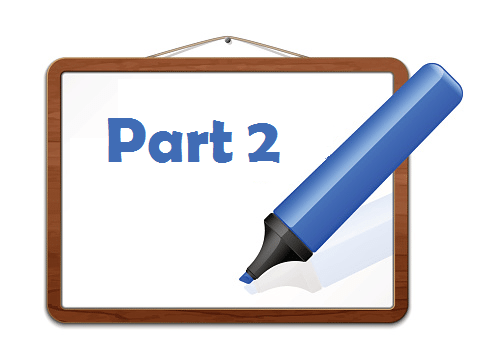

### **STEP 7: Aligning Datasets**

In [34]:
import pandas as pd

# Load datasets
releases = pd.read_csv("cleaned_combined_releases.csv")
disposals = pd.read_csv("cleaned_combined_disposals.csv")

# Find common columns
common_columns = set(releases.columns).intersection(disposals.columns)
print(f"Common columns: {common_columns}")

# Align datasets
aligned_releases = releases[list(common_columns)]
aligned_disposals = disposals[list(common_columns)]

print("Datasets aligned successfully.")



Common columns: {'city', 'company_name_dénomination_sociale_de_lentreprise', 'reporting_year_année', 'province', 'units_unités', 'substance_name_english_nom_de_substance_anglais', 'naics_title_titre_code_scian', 'naics_code_scian', 'latitude', 'longitude', 'npri_id_no_inrp', 'facility_name_installation', 'cas_number_no_cas', 'split'}
Datasets aligned successfully.


### STEP 8: Merging

#### **Merging Releases vs Disposals**

In [35]:
import pandas as pd

# Load datasets
releases = pd.read_csv("cleaned_combined_releases.csv")
disposals = pd.read_csv("cleaned_combined_disposals.csv")

# Identify common columns
common_columns = set(releases.columns).intersection(disposals.columns)
print(f"Common columns: {common_columns}")

# Drop the common columns from one of the datasets before merging
releases_dropped = releases.drop(columns=common_columns, errors='ignore')
disposals_dropped = disposals.drop(columns=common_columns, errors='ignore')

# Merge the datasets
merged_data = pd.concat([releases_dropped, disposals], axis=1)

# Save the merged dataset
merged_data.to_csv("merged_data_no_common.csv", index=False)
print("Merged dataset saved as 'merged_data_no_common.csv'.")




Common columns: {'city', 'company_name_dénomination_sociale_de_lentreprise', 'reporting_year_année', 'province', 'units_unités', 'substance_name_english_nom_de_substance_anglais', 'naics_title_titre_code_scian', 'naics_code_scian', 'latitude', 'longitude', 'npri_id_no_inrp', 'facility_name_installation', 'cas_number_no_cas', 'split'}
Merged dataset saved as 'merged_data_no_common.csv'.


In [36]:
# Load the original datasets for comparison
releases = pd.read_csv("cleaned_combined_releases.csv")
disposals = pd.read_csv("cleaned_combined_disposals.csv")
merged_data = pd.read_csv("merged_data_no_common.csv")

# Original columns
print("Columns in Releases dataset:")
print(releases.columns)

print("\nColumns in Disposals dataset:")
print(disposals.columns)

# Merged dataset columns
print("\nColumns in Merged dataset:")
print(merged_data.columns)

# Check if the common columns appear only once in the merged dataset
common_columns = set(releases.columns).intersection(disposals.columns)
print(f"\nCommon columns: {common_columns}")

print("\nMerged dataset column count:", len(merged_data.columns))
print("Original unique columns (Releases + Disposals - Common):",
      len(releases.columns) + len(disposals.columns) - len(common_columns))


Columns in Releases dataset:
Index(['reporting_year_année', 'npri_id_no_inrp',
       'company_name_dénomination_sociale_de_lentreprise',
       'facility_name_installation', 'naics_code_scian',
       'naics_title_titre_code_scian', 'province', 'city', 'latitude',
       'longitude', 'cas_number_no_cas',
       'substance_name_english_nom_de_substance_anglais', 'units_unités',
       'release_to_air_fugitive', 'release_to_air_other_nonpoint',
       'release_to_air_road_dust', 'release_to_air_spills',
       'release_to_air_stack_point', 'release_to_air_storage_handling',
       'releases_to_land_leaks', 'releases_to_land_other',
       'releases_to_land_spills', 'releases_to_water_bodies_direct_discharges',
       'releases_to_water_bodies_leaks', 'releases_to_water_bodies_spills',
       'sum_of_release_to_all_media_1tonne', 'split'],
      dtype='object')

Columns in Disposals dataset:
Index(['reporting_year_année', 'npri_id_no_inrp',
       'company_name_dénomination_sociale_de_le

<ipython-input-36-5107dec4784f>:4: DtypeWarning: Columns (15,16,18,19,20,23,24,25,37) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_data = pd.read_csv("merged_data_no_common.csv")


#### **Merging Merged Data vs Statcan**

Disposal of waste, by Statcan- Frequency: Every 2 years

https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3810003201&cubeTimeFrame.startYear=2002&cubeTimeFrame.endYear=2022&referencePeriods=20020101%2C20220101

In [37]:
# Define file paths
path_statcan = "/content/drive/My Drive/3810003201-eng.csv"
path_merged = "merged_data_no_common.csv"

# Load datasets with appropriate error handling
try:
    # Load the datasets
    df_statcan = pd.read_csv(path_statcan, encoding='latin1', low_memory=False)
    merged_data = pd.read_csv(path_merged, low_memory=False)

    # Print file information
    print("Files loaded successfully!")
    print("\nColumns in df_statcan:")
    print(df_statcan.columns)
    print("\nColumns in merged_data:")
    print(merged_data.columns)

except FileNotFoundError as e:
    print(f"File not found: {e}")
except pd.errors.ParserError as e:
    print(f"Error parsing the file: {e}")
except Exception as e:
    print(f"An error occurred: {e}")



Files loaded successfully!

Columns in df_statcan:
Index(['ï»¿Geography', 'Sources of waste for disposal', '2002', '2004', '2006',
       '2008', '2010', '2012', '2014', '2016', '2018', '2020', '2022'],
      dtype='object')

Columns in merged_data:
Index(['release_to_air_fugitive', 'release_to_air_other_nonpoint',
       'release_to_air_road_dust', 'release_to_air_spills',
       'release_to_air_stack_point', 'release_to_air_storage_handling',
       'releases_to_land_leaks', 'releases_to_land_other',
       'releases_to_land_spills', 'releases_to_water_bodies_direct_discharges',
       'releases_to_water_bodies_leaks', 'releases_to_water_bodies_spills',
       'sum_of_release_to_all_media_1tonne', 'reporting_year_année',
       'npri_id_no_inrp', 'company_name_dénomination_sociale_de_lentreprise',
       'facility_name_installation', 'naics_code_scian',
       'naics_title_titre_code_scian', 'province', 'city', 'latitude',
       'longitude', 'cas_number_no_cas',
       'substance_na

In [38]:
df_statcan.head()

,ï»¿Geography,Sources of waste for disposal,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020,2022
0,Canada,NaN,Tonnes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Canada,All sources of waste for disposal,"24,081,371","25,226,766","26,417,011","25,926,476","24,952,415","24,681,474","24,766,650","24,940,747","25,733,021","26,107,720","26,617,188"
2,Canada,Residential sources of waste for disposal 4,"8,446,766","8,961,583","9,748,217","9,360,400","9,448,165","9,684,615","9,803,644","10,225,943","10,848,238","10,862,118","10,698,180"
3,Canada,Non-residential sources of waste for disposal 5,"15,634,606","16,265,183","16,668,793","16,566,076","15,504,250","14,996,859","14,963,007","14,714,804","14,884,782","15,245,602","15,919,008"
4,Newfoundland and Labrador,All sources of waste for disposal,"376,594","400,048","428,809","399,184","394,235","391,571","415,158","395,324","373,668","365,210","364,313"


In [39]:
merged_data.head()


,release_to_air_fugitive,release_to_air_other_nonpoint,release_to_air_road_dust,release_to_air_spills,release_to_air_stack_point,release_to_air_storage_handling,releases_to_land_leaks,releases_to_land_other,releases_to_land_spills,releases_to_water_bodies_direct_discharges,...,offsite_disposal_storage,offsite_disposal_tailings_management,offsite_disposal_underground_injection,offsite_disposal_waste_rock_management,onsite_disposal_land_treatment,onsite_disposal_landfill,onsite_disposal_tailings_management,onsite_disposal_underground_injection,onsite_disposal_waste_rock_management,split
0,0.0,NaN,NaN,NaN,5.20,NaN,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train
1,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.006,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train
2,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.002,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train
3,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.003,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train
4,0.0,NaN,NaN,NaN,0.79,NaN,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train


In [40]:
# Clean and rename columns
df_statcan.rename(columns={'ï»¿Geography': 'Geography'}, inplace=True)
df_statcan.columns = df_statcan.columns.str.strip()
merged_data.columns = merged_data.columns.str.strip()

# Check loaded columns
print("Columns in df_statcan:", df_statcan.columns)
print("Columns in merged_data:", merged_data.columns)


Columns in df_statcan: Index(['Geography', 'Sources of waste for disposal', '2002', '2004', '2006',
       '2008', '2010', '2012', '2014', '2016', '2018', '2020', '2022'],
      dtype='object')
Columns in merged_data: Index(['release_to_air_fugitive', 'release_to_air_other_nonpoint',
       'release_to_air_road_dust', 'release_to_air_spills',
       'release_to_air_stack_point', 'release_to_air_storage_handling',
       'releases_to_land_leaks', 'releases_to_land_other',
       'releases_to_land_spills', 'releases_to_water_bodies_direct_discharges',
       'releases_to_water_bodies_leaks', 'releases_to_water_bodies_spills',
       'sum_of_release_to_all_media_1tonne', 'reporting_year_année',
       'npri_id_no_inrp', 'company_name_dénomination_sociale_de_lentreprise',
       'facility_name_installation', 'naics_code_scian',
       'naics_title_titre_code_scian', 'province', 'city', 'latitude',
       'longitude', 'cas_number_no_cas',
       'substance_name_english_nom_de_substance_angl

In [41]:
# Keep only "All sources of waste for disposal"
df_statcan_filtered = df_statcan[df_statcan["Sources of waste for disposal"] == "All sources of waste for disposal"]

# Verify the filtered data
print("Filtered df_statcan shape:", df_statcan_filtered.shape)


Filtered df_statcan shape: (12, 13)


In [42]:
# Step 1: Melt the StatCan dataset into a long format
df_statcan_long = df_statcan.melt(
    id_vars=["Geography", "Sources of waste for disposal"],  # Keep these columns intact
    var_name="reporting_year_année",  # Convert year columns to rows
    value_name="Waste_Disposal"       # The values in year columns
)

# Step 2: Clean and convert the year column
df_statcan_long["reporting_year_année"] = pd.to_numeric(df_statcan_long["reporting_year_année"], errors="coerce")

# Step 3: Filter for "All sources of waste for disposal"
df_statcan_filtered = df_statcan_long[df_statcan_long["Sources of waste for disposal"] == "All sources of waste for disposal"]

# Step 4: Map Geography to Province Abbreviations
province_mapping = {
    "Ontario": "ON", "Alberta": "AB", "British Columbia": "BC",
    "Quebec": "QC", "Quebec 6": "QC", "Saskatchewan": "SK",
    "Nova Scotia": "NS", "Manitoba": "MB", "New Brunswick": "NB",
    "Newfoundland and Labrador": "NL", "Prince Edward Island": "PE",
    "Northwest Territories": "NT", "Nunavut": "NU", "Yukon": "YT", "Canada": "Canada"
}
df_statcan_filtered["province"] = df_statcan_filtered["Geography"].map(province_mapping)

# Step 5: Merge with the Other Dataset
df_merged = pd.merge(
    merged_data,  # Your other dataset
    df_statcan_filtered[["province", "reporting_year_année", "Waste_Disposal"]],
    how="left",  # Retain all rows from merged_data
    on=["province", "reporting_year_année"]
)

# Step 6: Verify the Merged Dataset
print("Shape of merged dataset:", df_merged.shape)
print("Sample of merged dataset:")
print(df_merged.head())



Shape of merged dataset: (567338, 39)
Sample of merged dataset:
   release_to_air_fugitive  release_to_air_other_nonpoint  \
0                      0.0                            NaN   
1                      0.0                            NaN   
2                      0.0                            NaN   
3                      0.0                            NaN   
4                      0.0                            NaN   

   release_to_air_road_dust  release_to_air_spills  \
0                       NaN                    NaN   
1                       NaN                    NaN   
2                       NaN                    NaN   
3                       NaN                    NaN   
4                       NaN                    NaN   

   release_to_air_stack_point  release_to_air_storage_handling  \
0                        5.20                              NaN   
1                         NaN                              NaN   
2                         NaN                 

<ipython-input-42-c426916a2ffb>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_statcan_filtered["province"] = df_statcan_filtered["Geography"].map(province_mapping)


In [43]:
# Check if 'Waste_Disposal' column exists in the DataFrame
if "Waste_Disposal" in df_merged.columns:
    # Print all unique values in the Waste_Disposal column
    print("Unique values in Waste_Disposal:")
    print(df_merged["Waste_Disposal"].unique())
else:
    print("'Waste_Disposal' column not found in df_merged.")


Unique values in Waste_Disposal:
[nan '2,687,882' '5,846,459' '2,890,294' '376,594' '389,194' 'x' '413,606'
 '896,556' '795,124' '9,645,633' '2,767,657' '3,077,311' '400,048'
 '442,173' '6,454,000' '794,933' '928,117' '9,809,264' '399,967'
 '6,808,440' '904,272' '3,819,872' '428,809' '2,917,080' '833,753'
 '9,710,459' '359,105' '511,706' '6,146,319' '399,184' '9,631,559'
 '945,441' '4,147,558' '2,811,568' '902,943' '479,461' '354,231'
 '1,020,481' '9,247,415' '937,268' '367,246' '2,658,271' '5,795,707'
 '394,235' '3,917,492' '475,265' '5,584,621' '9,208,839' '3,913,924'
 '957,670' '1,017,663' '2,604,147' '365,079' '492,938' '391,571'
 '9,165,299' '4,097,584' '2,721,309' '990,230' '940,595' '5,414,539'
 '415,158' '508,115' '364,193' '9,475,472' '2,614,087' '4,206,668'
 '969,289' '898,404' '5,356,134' '375,258' '503,123' '395,324' '2,719,877'
 '10,085,613' '963,256' '5,563,136' '392,328' '507,848' '373,668'
 '4,118,081' '864,753' '53,972' '399,735' '365,210' '498,839' '2,803,431'
 '4,044

In [44]:
# Perform an inner join to compare province, year, and Waste_Disposal
comparison_df = pd.merge(
    df_statcan_filtered[["province", "reporting_year_année", "Waste_Disposal"]],
    df_merged[["province", "reporting_year_année", "Waste_Disposal"]],
    on=["province", "reporting_year_année"],
    suffixes=("_statcan", "_merged")
)

# Display the comparison
print("Comparison of Waste_Disposal between df_statcan_filtered and df_merged:")
print(comparison_df)



Comparison of Waste_Disposal between df_statcan_filtered and df_merged:
      province  reporting_year_année Waste_Disposal_statcan  \
0           NL                  2002                376,594   
1           NL                  2002                376,594   
2           NL                  2002                376,594   
3           NL                  2002                376,594   
4           NL                  2002                376,594   
...        ...                   ...                    ...   
44037       BC                  2022              2,845,820   
44038       BC                  2022              2,845,820   
44039       BC                  2022              2,845,820   
44040       BC                  2022              2,845,820   
44041       BC                  2022              2,845,820   

      Waste_Disposal_merged  
0                   376,594  
1                   376,594  
2                   376,594  
3                   376,594  
4                   3

### **STEP 9: Feature Encoding**

Convert categorical columns to numerical using encoding techniques, consistently applied across all splits.

In [45]:
# Identify categorical columns
categorical_columns = df_merged.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)


Categorical columns: Index(['company_name_dénomination_sociale_de_lentreprise',
       'facility_name_installation', 'naics_title_titre_code_scian',
       'province', 'city', 'cas_number_no_cas',
       'substance_name_english_nom_de_substance_anglais', 'units_unités',
       'split', 'Waste_Disposal'],
      dtype='object')


In [46]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_columns = df_merged.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

# Drop irrelevant columns (if not already dropped)
columns_to_drop = [
    'company_name_dénomination_sociale_de_lentreprise',
    'facility_name_installation',
    'city',
    'split',
    'cas_number_no_cas',
    'cas_number_no_cas',
    'sum_of_release_to_all_media_1tonne',
    'latitude',
    'longitude'

]
df_merged = df_merged.drop(columns=columns_to_drop, errors='ignore')

print("Columns after dropping irrelevant ones:")
print(df_merged.columns)

# Apply Label Encoding for categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    if col in df_merged.columns:  # Ensure the column is still in the DataFrame after dropping
        df_merged[col] = label_encoder.fit_transform(df_merged[col].astype(str))

print("Data types after encoding:")
print(df_merged.dtypes)

# Save the processed dataset if needed
df_merged.to_csv("processed_merged_data.csv", index=False)
print("Processed data saved to 'processed_merged_data.csv'")


Categorical columns: Index(['company_name_dénomination_sociale_de_lentreprise',
       'facility_name_installation', 'naics_title_titre_code_scian',
       'province', 'city', 'cas_number_no_cas',
       'substance_name_english_nom_de_substance_anglais', 'units_unités',
       'split', 'Waste_Disposal'],
      dtype='object')
Columns after dropping irrelevant ones:
Index(['release_to_air_fugitive', 'release_to_air_other_nonpoint',
       'release_to_air_road_dust', 'release_to_air_spills',
       'release_to_air_stack_point', 'release_to_air_storage_handling',
       'releases_to_land_leaks', 'releases_to_land_other',
       'releases_to_land_spills', 'releases_to_water_bodies_direct_discharges',
       'releases_to_water_bodies_leaks', 'releases_to_water_bodies_spills',
       'reporting_year_année', 'npri_id_no_inrp', 'naics_code_scian',
       'naics_title_titre_code_scian', 'province',
       'substance_name_english_nom_de_substance_anglais', 'units_unités',
       'offsite_disposa

#### **Splitting the Data**

In [47]:
import pandas as pd

# Define a function to split the processed dataset
def process_and_split_data(df, year_column, train_end_year, valid_end_year):
    """
    Splits the dataset into train, validation, and test sets based on year.

    Args:
    df (pd.DataFrame): The dataset to split.
    year_column (str): The name of the column containing year information.
    train_end_year (int): The end year for the training set.
    valid_end_year (int): The end year for the validation set.

    Returns:
    tuple: Train, validation, and test datasets.
    """
    # Ensure the year column is numeric and handle missing values
    df[year_column] = pd.to_numeric(df[year_column], errors='coerce')  # Convert to numeric
    df = df.dropna(subset=[year_column])  # Drop rows with missing years

    # Sort the data by year for clarity
    df = df.sort_values(by=year_column)

    # Create train, validation, and test sets
    train_df = df[df[year_column] <= train_end_year]
    valid_df = df[(df[year_column] > train_end_year) & (df[year_column] <= valid_end_year)]
    test_df = df[df[year_column] > valid_end_year]

    return train_df, valid_df, test_df

# Set parameters for splitting
train_end_year = 2018  # Training data up to 2018
valid_end_year = 2020  # Validation data for 2019-2020

# Use the correct column name for year
year_column = 'reporting_year_année'  # Ensure this matches the column name in your dataset

# Load the processed merged dataset
processed_data_path = "processed_merged_data.csv"  # Updated file name
processed_data = pd.read_csv(processed_data_path)

# Process and split the processed dataset
train_processed, valid_processed, test_processed = process_and_split_data(
    processed_data, year_column, train_end_year, valid_end_year
)

# Display the number of rows in each split
print(f"Training set: {train_processed.shape[0]} rows")
print(f"Validation set: {valid_processed.shape[0]} rows")
print(f"Test set: {test_processed.shape[0]} rows")

# Save the splits to separate files for later use
train_processed.to_csv("train_processed.csv", index=False)
valid_processed.to_csv("valid_processed.csv", index=False)
test_processed.to_csv("test_processed.csv", index=False)

print("Train, validation, and test datasets have been saved.")



Training set: 77728 rows
Validation set: 6953 rows
Test set: 6311 rows
Train, validation, and test datasets have been saved.


In [48]:
# Calculate the total rows in all splits
total_rows_split = len(train_processed) + len(valid_processed) + len(test_processed)

# Sum rows for each split
train_rows = len(train_processed)
valid_rows = len(valid_processed)
test_rows = len(test_processed)

# Calculate percentages
train_percentage = (train_rows / total_rows_split) * 100
valid_percentage = (valid_rows / total_rows_split) * 100
test_percentage = (test_rows / total_rows_split) * 100

# Print the results
print(f"Total rows in splits: {total_rows_split}")
print(f"Training set: {train_rows} rows ({train_percentage:.2f}%)")
print(f"Validation set: {valid_rows} rows ({valid_percentage:.2f}%)")
print(f"Test set: {test_rows} rows ({test_percentage:.2f}%)")



Total rows in splits: 90992
Training set: 77728 rows (85.42%)
Validation set: 6953 rows (7.64%)
Test set: 6311 rows (6.94%)


## **STEP 10: Normalization**

In [49]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the processed dataset
processed_data_path = "processed_merged_data.csv"  # Update this to your file name
processed_data = pd.read_csv(processed_data_path)

# Identify numerical columns
numerical_columns = processed_data.select_dtypes(include=['float64', 'int64']).columns
print(f"Numerical columns: {numerical_columns}")

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize numerical columns
processed_data[numerical_columns] = scaler.fit_transform(processed_data[numerical_columns])

# Save the normalized dataset
processed_data.to_csv("normalized_processed_data.csv", index=False)

print("Data has been normalized and saved to 'normalized_processed_data.csv'")


Numerical columns: Index(['release_to_air_fugitive', 'release_to_air_other_nonpoint',
       'release_to_air_road_dust', 'release_to_air_spills',
       'release_to_air_stack_point', 'release_to_air_storage_handling',
       'releases_to_land_leaks', 'releases_to_land_other',
       'releases_to_land_spills', 'releases_to_water_bodies_direct_discharges',
       'releases_to_water_bodies_leaks', 'releases_to_water_bodies_spills',
       'reporting_year_année', 'npri_id_no_inrp', 'naics_code_scian',
       'naics_title_titre_code_scian', 'province',
       'substance_name_english_nom_de_substance_anglais', 'units_unités',
       'offsite_disposal_land_treatment', 'offsite_disposal_landfill',
       'offsite_disposal_storage', 'offsite_disposal_tailings_management',
       'offsite_disposal_underground_injection',
       'offsite_disposal_waste_rock_management',
       'onsite_disposal_land_treatment', 'onsite_disposal_landfill',
       'onsite_disposal_tailings_management',
       'onsit

## **STEP 11: Feature Engineering**

In [50]:
import pandas as pd

# Load the normalized dataset
normalized_data_path = "normalized_processed_data.csv"  # Update this with your file name
data = pd.read_csv(normalized_data_path)

# Calculate total releases (sum of all types of releases)
data['total_release'] = data[['release_to_air_fugitive', 'release_to_air_other_nonpoint',
                              'release_to_air_road_dust', 'release_to_air_spills',
                              'release_to_air_stack_point', 'release_to_air_storage_handling',
                              'releases_to_land_leaks', 'releases_to_land_other',
                              'releases_to_land_spills', 'releases_to_water_bodies_direct_discharges',
                              'releases_to_water_bodies_leaks', 'releases_to_water_bodies_spills']].sum(axis=1)

# Calculate total disposals (sum of all on-site and off-site disposals)
data['total_disposal'] = data[['onsite_disposal_land_treatment', 'onsite_disposal_landfill',
                               'onsite_disposal_tailings_management', 'onsite_disposal_underground_injection',
                               'onsite_disposal_waste_rock_management', 'offsite_disposal_storage',
                               'offsite_disposal_tailings_management', 'offsite_disposal_land_treatment',
                               'offsite_disposal_landfill', 'offsite_disposal_underground_injection',
                               'offsite_disposal_waste_rock_management']].sum(axis=1)

# Save the dataset with the new features
data.to_csv("engineered_data_with_totals.csv", index=False)

print("Feature engineering completed.")
print("New columns 'total_release' and 'total_disposal' added.")
print("Processed dataset saved to 'engineered_data_with_totals.csv'.")





Feature engineering completed.
New columns 'total_release' and 'total_disposal' added.
Processed dataset saved to 'engineered_data_with_totals.csv'.


#### **Pearson Correlation**

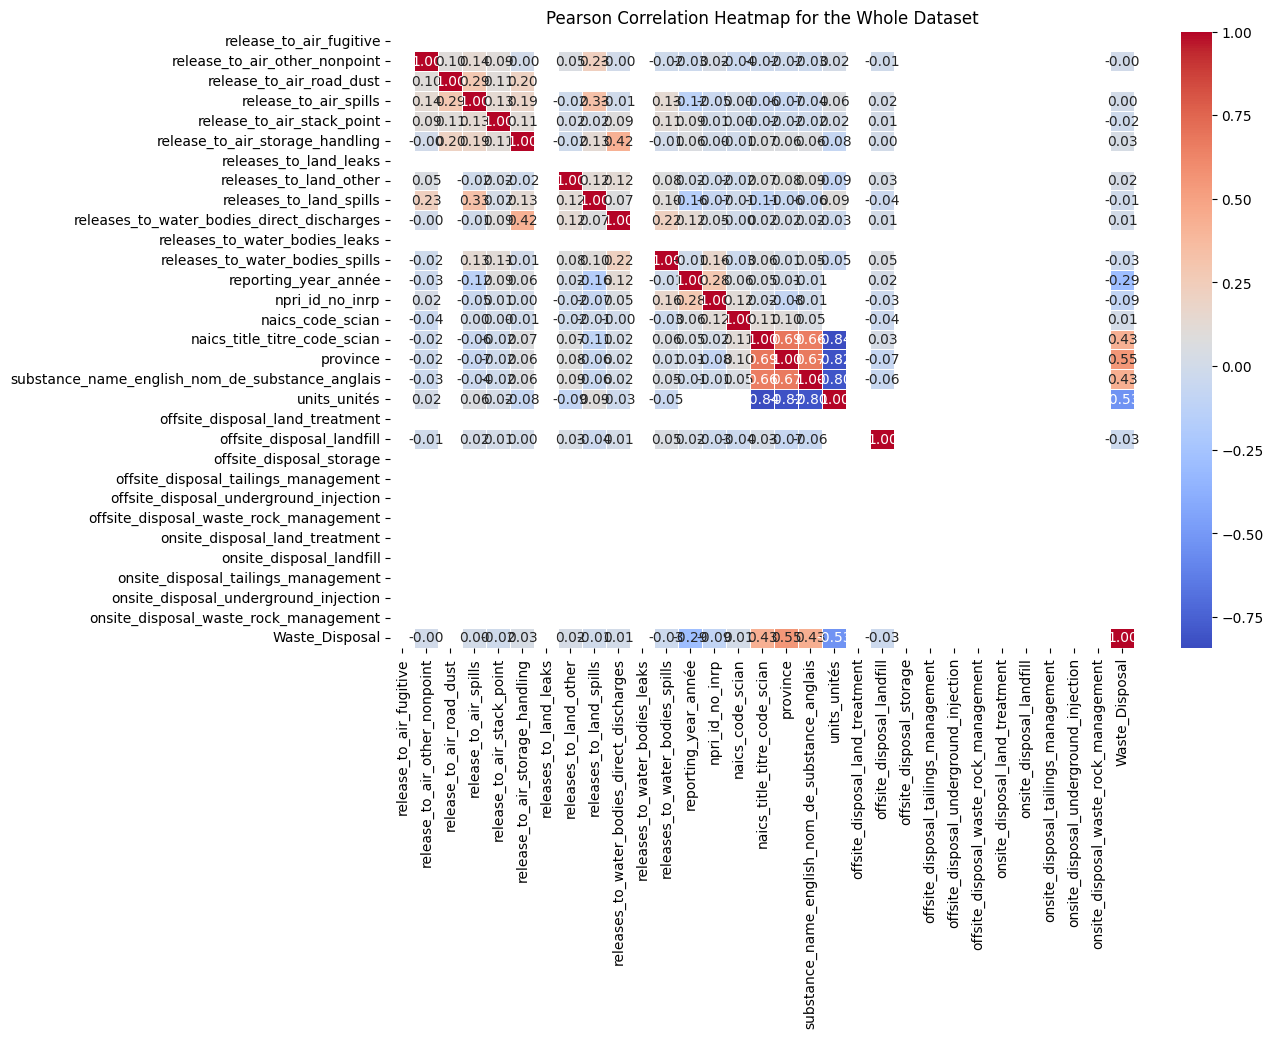

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the processed data
file_path = "processed_merged_data.csv"
data = pd.read_csv(file_path)

# Calculate correlation matrix for numerical features
correlation_matrix = data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Pearson Correlation Heatmap for the Whole Dataset")
plt.show()


In [52]:
import pandas as pd

# Load the dataset
data_path = "processed_merged_data.csv"  # Update this with your file name
data = pd.read_csv(data_path)

# Calculate Pearson correlation for all numeric columns
pearson_corr = data.corr(method='pearson')

# Save the correlation matrix to a CSV file
pearson_corr.to_csv("pearson_correlation_matrix.csv")

# Print the correlation matrix
print("Pearson Correlation Matrix:")
print(pearson_corr)

# Optional: Find specific correlations for 'total_releases' and 'total_disposals'
if 'total_releases' in data.columns and 'total_disposals' in data.columns:
    release_disposal_corr = data['total_releases'].corr(data['total_disposals'], method='pearson')
    print(f"Pearson Correlation between Total Releases and Total Disposals: {release_disposal_corr}")


Pearson Correlation Matrix:
                                                 release_to_air_fugitive  \
release_to_air_fugitive                                              NaN   
release_to_air_other_nonpoint                                        NaN   
release_to_air_road_dust                                             NaN   
release_to_air_spills                                                NaN   
release_to_air_stack_point                                           NaN   
release_to_air_storage_handling                                      NaN   
releases_to_land_leaks                                               NaN   
releases_to_land_other                                               NaN   
releases_to_land_spills                                              NaN   
releases_to_water_bodies_direct_discharges                           NaN   
releases_to_water_bodies_leaks                                       NaN   
releases_to_water_bodies_spills                             

#### **ANOVA Test for Feature Selection - Per Industry**

In [54]:
print("Columns in the dataset:")
print(data.columns)

Columns in the dataset:
Index(['release_to_air_fugitive', 'release_to_air_other_nonpoint',
       'release_to_air_road_dust', 'release_to_air_spills',
       'release_to_air_stack_point', 'release_to_air_storage_handling',
       'releases_to_land_leaks', 'releases_to_land_other',
       'releases_to_land_spills', 'releases_to_water_bodies_direct_discharges',
       'releases_to_water_bodies_leaks', 'releases_to_water_bodies_spills',
       'reporting_year_année', 'npri_id_no_inrp', 'naics_code_scian',
       'naics_title_titre_code_scian', 'province',
       'substance_name_english_nom_de_substance_anglais', 'units_unités',
       'offsite_disposal_land_treatment', 'offsite_disposal_landfill',
       'offsite_disposal_storage', 'offsite_disposal_tailings_management',
       'offsite_disposal_underground_injection',
       'offsite_disposal_waste_rock_management',
       'onsite_disposal_land_treatment', 'onsite_disposal_landfill',
       'onsite_disposal_tailings_management',
       '

In [55]:
# Calculate total releases (sum of all release types)
data['total_releases'] = (
    data['release_to_air_fugitive'] +
    data['release_to_air_other_nonpoint'] +
    data['release_to_air_road_dust'] +
    data['release_to_air_spills'] +
    data['release_to_air_stack_point'] +
    data['release_to_air_storage_handling'] +
    data['releases_to_land_leaks'] +
    data['releases_to_land_other'] +
    data['releases_to_land_spills'] +
    data['releases_to_water_bodies_direct_discharges'] +
    data['releases_to_water_bodies_leaks'] +
    data['releases_to_water_bodies_spills']
)

# Calculate total disposals (sum of onsite and offsite disposals)
data['total_disposals'] = (
    data['onsite_disposal_land_treatment'] +
    data['onsite_disposal_landfill'] +
    data['onsite_disposal_tailings_management'] +
    data['onsite_disposal_underground_injection'] +
    data['onsite_disposal_waste_rock_management'] +
    data['offsite_disposal_land_treatment'] +
    data['offsite_disposal_landfill'] +
    data['offsite_disposal_storage'] +
    data['offsite_disposal_tailings_management'] +
    data['offsite_disposal_underground_injection'] +
    data['offsite_disposal_waste_rock_management']
)

# Save the updated dataset
data.to_csv("processed_merged_data_updated.csv", index=False)


In [57]:
from scipy.stats import f_oneway
import pandas as pd

# Check for missing values in key columns
print("Missing values per column:")
print(data[['province', 'total_releases', 'total_disposals']].isnull().sum())

# Drop rows with missing values in relevant columns
data = data.dropna(subset=['province', 'total_releases', 'total_disposals'])

# Ensure valid data types
data['province'] = data['province'].astype(str)
data['total_releases'] = pd.to_numeric(data['total_releases'], errors='coerce')
data['total_disposals'] = pd.to_numeric(data['total_disposals'], errors='coerce')

# Perform ANOVA for 'total_releases' grouped by 'province'
release_groups = [group['total_releases'].values for _, group in data.groupby('province') if len(group) > 1]

if len(release_groups) > 1:  # Ensure there are at least two groups
    anova_result_releases = f_oneway(*release_groups)
    print("ANOVA result for Total Releases by Province:")
    print(anova_result_releases)
else:
    print("Not enough valid groups for ANOVA on Total Releases.")

# Perform ANOVA for 'total_disposals' grouped by 'province'
disposal_groups = [group['total_disposals'].values for _, group in data.groupby('province') if len(group) > 1]

if len(disposal_groups) > 1:  # Ensure there are at least two groups
    anova_result_disposals = f_oneway(*disposal_groups)
    print("ANOVA result for Total Disposals by Province:")
    print(anova_result_disposals)
else:
    print("Not enough valid groups for ANOVA on Total Disposals.")




Missing values per column:
province                0
total_releases     567338
total_disposals    476346
dtype: int64
Not enough valid groups for ANOVA on Total Releases.
Not enough valid groups for ANOVA on Total Disposals.


## **STEP 12: Observed Patterns & Potential Causes**


1.   **Decrease in Total Releases from 2013 to 2022**



  * Between 2013 and 2022, total releases to the environment decreased by approximately 566,449 tonnes (16%).
  * Potential Cause: This decrease might be attributed to stricter environmental regulations and improved pollution control measures by industries.


2.   **Increase in Disposals and Transfers by 29%**



  * During the same period, disposals and transfers rose by about 456,223 tonnes (29%).
  * Potential Cause: This increase suggests a shift from direct releases to controlled waste management strategies like landfills, recycling, and treatment. It indicates industries are adopting better waste management practices to comply with regulatory requirements and minimize environmental impacts.


3. **Different Trends in Media of Releases**

  * Air Releases: Air releases accounted for the majority of total releases, with emissions primarily including carbon monoxide, sulfur dioxide, and nitrogen oxides. These pollutants are often associated with smog and acid rain.

  * Water Releases: Pollutant releases to water increased by 15,233 tonnes (12%), with significant releases from nitrate ions, ammonia, and phosphorus.

  * Land Releases: Land releases saw a notable increase of 6,166 tonnes (56%) over the period.

4. **Proportion of Releases to Disposals**

  * The overall proportion of releases to disposals appears to be declining, indicating that more pollutants are being managed through controlled disposal methods rather than being released directly into the environment.

5. **Variability Across Provinces**

  * Significant differences were observed in releases across provinces, with provinces like Alberta showing higher releases, especially in the Oil and Gas sector.

6. **Presence of Outliers in Data**

  * Outliers were identified in the release data, particularly in air emissions like stack/point releases, suggesting occasional spikes in emissions that may correspond to specific events, like maintenance shutdowns, accidents, or exceptional production increases.

The "Comments" tab of the NPRI data contains information that can help interpret trends in releases and disposals. Here are some notable insights:

Changes in Reporting Requirements: Over time, reporting thresholds, substances, and target activities have changed, which can impact the interpretation of trends.

New reporting activities and added sectors have led to spikes in reported data. For example, adding criteria air contaminants and oil and gas extraction in 2002 and 2003 resulted in a significant increase in reportingns:** The NPRI does not cover all pollution sources or include data from provincial programs. It also doesn't include diffuse emissions like those from transportation or agriculture. These limitations mean that trends in releases and disposals are only part of the broader environmental picture .

**Quality Continconsistencies, such as incorrect units, missing data, or decimal errors, are common. Efforts are made to verify and correct these errors, but they can still contribute to anomalies or fluctuations in the trends .

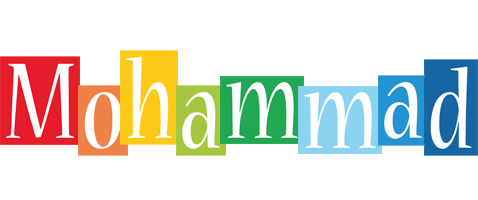

# **PART 1- Professor: Mohammad- CMPT 3510**

## **STEP 1: Classification Project**

**Goal:**  The primary goal of this project is to predict the proportion of releases to disposals in 2023.

**Reflection: Why My Problem is a Regression Task, Not Classification**
As I work through Phase 1 of this project, I realize that understanding the difference between regression and classification is crucial to solving my problem effectively. Initially, I struggled to distinguish between the two, but reflecting on it has clarified why my task is fundamentally about regression.

I now understand that:

**Regression vs. Classification**

Regression is used when the goal is to predict a continuous outcome, meaning the result can be any number within a range. In contrast, classification deals with sorting data into distinct categories or labels.
For instance, if I were trying to classify the data into predefined groups like "High", "Medium", or "Low," that would be classification. But, in my case, I am trying to predict a numerical value: the proportion of total releases to total disposals.
The value I am interested in can be something like 0.25 or 0.67—specific, continuous numbers that indicate how much releases compare to disposals.

**Why My Task is Regression**
As I reflect on my problem statement, I realize that I am not just trying to categorize releases or disposals; I am trying to predict the exact proportion of releases relative to disposals in 2023. This makes it clear that my problem is regression because:


*   I need a model that can predict how much the proportion will be, not just whether it is “high” or “low.”
*   The nature of the output is continuous, meaning it can take on any numerical value within a range, which is the essence of regression.
* By predicting specific values, I can understand not just the trend but the exact change over time, which is essential for planning and decision-making.


**Why Classification Doesn't Fit**

At first, I thought classification might be useful for my problem, but as I explored further, I realized its limitations. Classification would only allow me to label the proportion as “high,” “medium,” or “low.” While this might offer some insight, it wouldn't capture how much the proportion changes from year to year. I need to know the precise amount of change, which only a regression model can provide.




### **Dataset Transformation**

* **Goal:** The primary goal of this project is to predict the proportion of releases to disposals in 2023

Steps:

* **Data Loading:** Loaded the "Releases 2000-2020" and "Disposals and Transfers 00-20" sheets.
* **Calculating Totals:**
  Summed up columns in df_releases to get total releases.
  Summed up columns in df_disposals to get total disposals.
* **Merging:** Merged df_releases and df_disposals on common columns ('Reporting_Year / Année' and 'NPRI_ID / No_INRP') to create a unified dataset.
* **Calculating Proportion:** Created the release_to_disposal_ratio column by dividing total releases by total disposals.
* **Handling Infinite and Missing Values:** Replaced inf values with NaN, handled missing values as needed, and confirmed there are no remaining infinite values.
* **Sorting Chronologically:** Converted Reporting_Year to datetime format (Date) and sorted the dataset by Date.

**Load the data**

**Calculate Total Releases and Total Disposals**

In [ ]:
# Calculate total releases based on the columns in df_releases
df_releases['total releases'] = (
    df_releases[['Release to Air - Fugitive', 'Release to Air - Other Non-Point',
                 'Release to Air - Road dust', 'Release to Air - Spills',
                 'Release to Air - Stack / Point', 'Release to Air - Storage / Handling',
                 'Releases to Land - Leaks', 'Releases to Land - Other',
                 'Releases to Land - Spills', 'Releases to Water Bodies - Direct Discharges',
                 'Releases to Water Bodies - Leaks', 'Releases to Water Bodies - Spills']]
    .sum(axis=1)
)

# Calculate total disposals based on the columns in df_disposals
df_disposals['total disposals'] = (
    df_disposals[['Off-site Disposal - Land Treatment', 'Off-site Disposal - Landfill',
                  'Off-site Disposal - Storage', 'Off-site Disposal - Tailings Management',
                  'Off-site Disposal - Underground Injection', 'Off-site Disposal - Waste Rock management',
                  'On-site Disposal - Land Treatment', 'On-site Disposal - Landfill',
                  'On-site Disposal - Tailings Management', 'On-site Disposal - Underground Injection',
                  'On-site Disposal - Waste Rock management']]
    .sum(axis=1)
)

# Print the first few rows of total releases and total disposals to inspect
print("First few rows of total releases:")
print(df_releases[['Reporting_Year / Année', 'NPRI_ID / No_INRP', 'total releases']].head())

print("\nFirst few rows of total disposals:")
print(df_disposals[['Reporting_Year / Année', 'NPRI_ID / No_INRP', 'total disposals']].head())

# Use .describe() to get summary statistics for total releases and total disposals
print("\nSummary of total releases:")
print(df_releases['total releases'].describe())

print("\nSummary of total disposals:")
print(df_disposals['total disposals'].describe())


**Calculate Proportion of Releases to Disposals**

In [ ]:
# Calculate the proportion of releases to disposals after merging
df['release_to_disposal_ratio'] = df['total releases'] / df['total disposals']

# Verify that the column has been created by inspecting the first few rows
print("First few rows with calculated release_to_disposal_ratio:")
print(df[['total releases', 'total disposals', 'release_to_disposal_ratio']].head())


In [ ]:
# Print the first few rows to inspect the release_to_disposal_ratio column
print("First few rows with calculated release_to_disposal_ratio:")
print(df[['total releases', 'total disposals', 'release_to_disposal_ratio']].head())

# Check for any missing values in release_to_disposal_ratio
print("\nMissing values in 'release_to_disposal_ratio':", df['release_to_disposal_ratio'].isnull().sum())

# Use .describe() to get summary statistics for release_to_disposal_ratio
print("\nSummary statistics for release_to_disposal_ratio:")
print(df['release_to_disposal_ratio'].describe())


**Sorting Chronologically**

In [ ]:
# Convert 'Reporting_Year / Année' to datetime and sort chronologically
df['Date'] = pd.to_datetime(df['Reporting_Year / Année'], format='%Y')
df = df.sort_values(by='Date')

# Check the first few rows to confirm
print("First few rows of the transformed dataset:")
print(df[['Date', 'NPRI_ID / No_INRP', 'total releases', 'total disposals', 'release_to_disposal_ratio']].head())


Impute Missing Values: Replace NaN with a specific value (e.g., 0 if appropriate) or use a statistical method like mean or median.

### **Classification Model**

* **Defining Target Classes:** Create classes from release_to_disposal_ratio to categorize proportions into meaningful labels (e.g., "Low," "Medium," "High").
* **Feature Selection:** Choose features that will be used to predict these classes.
* **Data Splitting:** Split the data into training and testing sets.
* **Model Selection:** Use a classification model, such as a Decision Tree Classifier.
* **Model Training and Evaluation:** Train the model on the training set and evaluate it on the test set.


**Defining Target Classes**

In [ ]:
# Define thresholds using percentiles for balanced classes
low_threshold = np.percentile(df['release_to_disposal_ratio'].dropna(), 33)  # 33rd percentile
high_threshold = np.percentile(df['release_to_disposal_ratio'].dropna(), 66)  # 66th percentile

# Function to categorize the release_to_disposal_ratio
def categorize_ratio(value):
    if value <= low_threshold:
        return 'Low'
    elif value <= high_threshold:
        return 'Medium'
    else:
        return 'High'

# Apply function to create a target classification column
df['proportion_category'] = df['release_to_disposal_ratio'].apply(categorize_ratio)

# Check the distribution of the classes
print("Class distribution:")
print(df['proportion_category'].value_counts())


The class distribution you’re seeing here is imbalanced, with a significantly higher count for the "High" category compared to "Low" and "Medium"

**Feature Selection**

Since our goal is to predict the proportion_category, we'll need to select relevant features.

In [ ]:
# Extract the year from the date for use as a feature (if not already done)
df['Year'] = df['Date'].dt.year

# Define the feature columns (X) and target column (y)
X = df[['Year']]  # Use other features if relevant
y = df['proportion_category']

### **Explanation & Justification**

**Simple Models:**

* **Linear Regression:** Suitable if there’s a linear relationship between features (e.g., year, sector) and the proportion of releases to disposals.
* **Decision Tree Regressor:** Useful for capturing simple, non-linear relationships in the data.
* **Polynomial Regression:** Use if you suspect a curved, polynomial relationship between features and proportion.
* **Logistic Regression:** Typically for binary classification, but could be adapted if the prediction task becomes categorical (e.g., low, medium, high proportions).

**Advanced Models (for Time Series Data):**

* **ARIMA** (Auto-Regressive Integrated Moving Average): Good for time-series data with linear trends and no seasonality.
* **Prophet: **Designed for time-series data that may have seasonality, holiday effects, or other trend-based patterns.
* **LSTM** (Long Short-Term Memory Networks): Ideal for sequential, time-series data where long-term dependencies are important.
* **SARIMA** (Seasonal ARIMA): Suitable for time-series data with both trend and seasonality components.
* **Feedforward Neural Networks:** A flexible option that can handle complex, non-linear relationships with sufficient training data.

**Ensemble Methods:**

* **Random Forest Regressor:** Works well for complex, non-linear relationships and is robust to overfitting with sufficient data.
* **Gradient Boosting:** (e.g., XGBoost, LightGBM, CatBoost): Powerful ensemble methods that capture complex patterns and are especially useful when accuracy is a priority.
* **Bagging Regressor:** Combines multiple models to reduce variance and improve stability.
* **Voting Regressor:** Combines predictions from multiple models to improve overall accuracy.
* **Stacked Models:** Layers multiple models to capture different aspects of data and improve predictive performance.

### **Recommended Models**

* Linear Regression

Use: If the relationship between features (e.g., year, sector) and the release-to-disposal proportion is linear.
Why: Simple, interpretable, and effective for data with a linear trend over time.

* Decision Tree Classifier (initial model):

Pros: Simple and interpretable.
Cons: Can be prone to overfitting, especially with a single feature.

* Random Forest Regressor

Use: If there are complex, non-linear relationships or interactions among features.
Why: Random Forests work well with non-linear data, handle missing values well, and are less prone to overfitting when sufficient data is available.

* Gradient Boosting (e.g., XGBoost, LightGBM, CatBoost)

Use: When high accuracy is critical, and you can handle longer training times.
Why: Gradient Boosting algorithms are highly effective at capturing complex, non-linear relationships and interactions between features. They tend to achieve high performance with proper tuning.

**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model on the training set
dt_model.fit(X_train, y_train)

# Validate the model on the validation set
y_valid_pred_dt = dt_model.predict(X_valid)
valid_accuracy_dt = accuracy_score(y_valid, y_valid_pred_dt)
print("Validation Accuracy (Decision Tree):", valid_accuracy_dt)

# Evaluate the model on the test set
y_test_pred_dt = dt_model.predict(X_test)
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
print("Test Accuracy (Decision Tree):", test_accuracy_dt)

# Display confusion matrix for test set
conf_matrix_dt = confusion_matrix(y_test, y_test_pred_dt, labels=['Low', 'Medium', 'High'])
print("Confusion Matrix (Test Set, Decision Tree):\n", conf_matrix_dt)


**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the Random Forest model on the training set
rf_model.fit(X_train, y_train)

# Validate the model on the validation set
y_valid_pred_rf = rf_model.predict(X_valid)
valid_accuracy_rf = accuracy_score(y_valid, y_valid_pred_rf)
print("Validation Accuracy (Random Forest):", valid_accuracy_rf)

# Evaluate the model on the test set
y_test_pred_rf = rf_model.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print("Test Accuracy (Random Forest):", test_accuracy_rf)

# Display confusion matrix for test set
conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf, labels=['Low', 'Medium', 'High'])
print("Confusion Matrix (Test Set, Random Forest):\n", conf_matrix_rf)


**Gradient Boosting Classifier (Using XGBoost)**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the training and test labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_valid_encoded = label_encoder.transform(y_valid)
y_test_encoded = label_encoder.transform(y_test)


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Train the XGBoost model on the training set
xgb_model.fit(X_train, y_train_encoded)

# Validate the model on the validation set
y_valid_pred_xgb = xgb_model.predict(X_valid)
valid_accuracy_xgb = accuracy_score(y_valid_encoded, y_valid_pred_xgb)
print("Validation Accuracy (XGBoost):", valid_accuracy_xgb)

# Evaluate the model on the test set
y_test_pred_xgb = xgb_model.predict(X_test)
test_accuracy_xgb = accuracy_score(y_test_encoded, y_test_pred_xgb)
print("Test Accuracy (XGBoost):", test_accuracy_xgb)

# Decode the predictions back to original labels for interpretation
y_test_pred_xgb_decoded = label_encoder.inverse_transform(y_test_pred_xgb)
conf_matrix_xgb = confusion_matrix(label_encoder.inverse_transform(y_test_encoded), y_test_pred_xgb_decoded, labels=['Low', 'Medium', 'High'])
print("Confusion Matrix (Test Set, XGBoost):\n", conf_matrix_xgb)


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model with a multinomial strategy for multi-class classification
lr_model = LogisticRegression(random_state=42, multi_class='ovr', max_iter=1000)

# Train the Logistic Regression model on the training set
lr_model.fit(X_train, y_train)

# Validate the model on the validation set
y_valid_pred_lr = lr_model.predict(X_valid)
valid_accuracy_lr = accuracy_score(y_valid, y_valid_pred_lr)
print("Validation Accuracy (Logistic Regression):", valid_accuracy_lr)

# Evaluate the model on the test set
y_test_pred_lr = lr_model.predict(X_test)
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
print("Test Accuracy (Logistic Regression):", test_accuracy_lr)

# Display confusion matrix for test set
conf_matrix_lr = confusion_matrix(y_test, y_test_pred_lr, labels=['Low', 'Medium', 'High'])
print("Confusion Matrix (Test Set, Logistic Regression):\n", conf_matrix_lr)


**Model Comparison**

In [ ]:
# Create a summary dictionary with model names and their accuracies
model_performance = {
    'Decision Tree': (valid_accuracy_dt, test_accuracy_dt),
    'Random Forest': (valid_accuracy_rf, test_accuracy_rf),
    'XGBoost': (valid_accuracy_xgb, test_accuracy_xgb),
    'Logistic Regression': (valid_accuracy_lr, test_accuracy_lr)
}

# Print the comparison table
print("Model Performance Comparison:")
print("Model\t\tValidation Accuracy\tTest Accuracy")
for model, scores in model_performance.items():
    print(f"{model}\t\t{scores[0]:.4f}\t\t{scores[1]:.4f}")


In [ ]:
print("Class distribution in training set:")
print(y_train.value_counts())

print("\nClass distribution in validation set:")
print(y_valid.value_counts())

print("\nClass distribution in test set:")
print(y_test.value_counts())


In [ ]:
# Check predictions on validation set for each model
y_valid_pred_dt = dt_model.predict(X_valid)
y_valid_pred_rf = rf_model.predict(X_valid)
y_valid_pred_xgb = xgb_model.predict(X_valid)
y_valid_pred_lr = lr_model.predict(X_valid)

print("Decision Tree validation predictions:", np.unique(y_valid_pred_dt, return_counts=True))
print("Random Forest validation predictions:", np.unique(y_valid_pred_rf, return_counts=True))
print("XGBoost validation predictions:", np.unique(y_valid_pred_xgb, return_counts=True))
print("Logistic Regression validation predictions:", np.unique(y_valid_pred_lr, return_counts=True))


NEW Analysis

In [ ]:
import pandas as pd

# Load the Excel file
file_path = "NPRI_2000-2022.xlsx"
df_releases = pd.read_excel(file_path, sheet_name='Releases 2000-2020')
df_disposals = pd.read_excel(file_path, sheet_name='Disposals and Transfers 00-20')

# Function to count unique company names for each NPRI_ID
def count_unique_company_names(df, npri_col, company_col):
    return df.groupby(npri_col)[company_col].nunique()

# Count unique company names for 'Releases'
unique_companies_releases = count_unique_company_names(
    df_releases,
    'NPRI_ID / No_INRP',
    'Company_Name / Dénomination_sociale_de_l\'entreprise'
)

# Count unique company names for 'Disposals'
unique_companies_disposals = count_unique_company_names(
    df_disposals,
    'NPRI_ID / No_INRP',
    'Company_Name / Dénomination_sociale_de_l\'entreprise'
)

# Print the results
print("Unique Companies in Releases:")
print(unique_companies_releases)

print("\nUnique Companies in Disposals:")
print(unique_companies_disposals)

# Optionally save the results to files
unique_companies_releases.to_csv("unique_companies_releases.csv", header=['Unique_Company_Names'])
unique_companies_disposals.to_csv("unique_companies_disposals.csv", header=['Unique_Company_Names'])


In [ ]:
import pandas as pd

# Load the Excel file
file_path = "NPRI_2000-2022.xlsx"
df_releases = pd.read_excel(file_path, sheet_name='Releases 2000-2020')
df_disposals = pd.read_excel(file_path, sheet_name='Disposals and Transfers 00-20')

# Function to get unique NAICS Titles
def get_unique_naics_titles(df, naics_col):
    return df[naics_col].dropna().unique()

# Get unique NAICS Titles for Releases
unique_naics_releases = get_unique_naics_titles(df_releases, 'NAICS Title / Titre Code_SCIAN')

# Get unique NAICS Titles for Disposals
unique_naics_disposals = get_unique_naics_titles(df_disposals, 'NAICS Title / Titre Code_SCIAN')

# Print the unique NAICS Titles
print("Unique NAICS Titles in Releases:")
print(unique_naics_releases)

print("\nUnique NAICS Titles in Disposals:")
print(unique_naics_disposals)

# Optionally save to files
pd.DataFrame(unique_naics_releases, columns=['NAICS Titles']).to_csv("unique_naics_releases.csv", index=False)
pd.DataFrame(unique_naics_disposals, columns=['NAICS Titles']).to_csv("unique_naics_disposals.csv", index=False)


In [ ]:
import pandas as pd

# Load the Excel file
file_path = "NPRI_2000-2022.xlsx"
df_releases = pd.read_excel(file_path, sheet_name='Releases 2000-2020')
df_disposals = pd.read_excel(file_path, sheet_name='Disposals and Transfers 00-20')

# Function to get unique substances and their count
def get_unique_substances(df, substance_col):
    unique_substances = df[substance_col].dropna().unique()  # Remove NaN and find unique substances
    total_unique = len(unique_substances)  # Total count of unique substances
    return unique_substances, total_unique

# Get unique substances for Releases
unique_substances_releases, total_releases = get_unique_substances(
    df_releases,
    'Substance Name (English) / Nom de substance (Anglais)'
)

# Get unique substances for Disposals
unique_substances_disposals, total_disposals = get_unique_substances(
    df_disposals,
    'Substance Name (English) / Nom de substance (Anglais)'
)

# Display results
print("Unique Substances in Releases:")
print(unique_substances_releases)
print(f"\nTotal Unique Substances in Releases: {total_releases}")

print("\nUnique Substances in Disposals:")
print(unique_substances_disposals)
print(f"\nTotal Unique Substances in Disposals: {total_disposals}")

# Optionally save to files
pd.DataFrame(unique_substances_releases, columns=['Unique Substances']).to_csv("unique_substances_releases.csv", index=False)
pd.DataFrame(unique_substances_disposals, columns=['Unique Substances']).to_csv("unique_substances_disposals.csv", index=False)


In [ ]:
# Function to count substances by units
def count_substances_by_units(df, substance_col, unit_col):
    # Group substances by Units and count the number of unique substances
    counts = df.groupby(unit_col)[substance_col].nunique()
    return counts

# Count substances for Releases
counts_releases = count_substances_by_units(
    df_releases,
    'Substance Name (English) / Nom de substance (Anglais)',
    'Units / Unités'
)

# Count substances for Disposals
counts_disposals = count_substances_by_units(
    df_disposals,
    'Substance Name (English) / Nom de substance (Anglais)',
    'Units / Unités'
)

# Display results
print("Releases - Count of Unique Substances by Units:")
print(counts_releases)

print("\nDisposals - Count of Unique Substances by Units:")
print(counts_disposals)


## **STEP 2: Regression Project**


### **Refinement of Dataset**

### **Regression Model Development**

### **Explanation & Justification**